### Importing the libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Collection :

In [2]:
train = pd.read_excel('Data_Train.xlsx')
pd.set_option("display.max_columns",None)
train

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

Here, I can see that our data set has 10683 Rows and 11 columns

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


From here I get to know that almost all the columns have ojects data type except 'Price', It is having 'int' Data type.

In [6]:
train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
13h 35m      1
27h 55m      1
35h 20m      1
33h 45m      1
37h 10m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

I can see there are null values present in the data set.

In [8]:
train.dropna(inplace = True)

Dropping the null values from the dataset.

In [9]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train.shape

(10682, 11)

In [13]:
train.describe(include = "all")

Airline Date_of_Journey Source Destination            Route  \
count         10682           10682  10682       10682            10682   
unique           12              44      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq           3849             504   4536        4536             2376   
mean            NaN             NaN    NaN         NaN              NaN   
std             NaN             NaN    NaN         NaN              NaN   
min             NaN             NaN    NaN         NaN              NaN   
25%             NaN             NaN    NaN         NaN              NaN   
50%             NaN             NaN    NaN         NaN              NaN   
75%             NaN             NaN    NaN         NaN              NaN   
max             NaN             NaN    NaN         NaN              NaN   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  \
count     10682        10682    10682       10682           10682   
unique      222         1343      368           5              10   
top       18:55        19:00   2h 50m      1 stop         No info   
freq        233          423      550        5625            8344   
mean        NaN          NaN      NaN         NaN             NaN   
std         NaN          NaN      NaN         NaN             NaN   
min         NaN          NaN      NaN         NaN             NaN   
25%         NaN          NaN      NaN         NaN             NaN   
50%         NaN          NaN      NaN         NaN             NaN   
75%         NaN          NaN      NaN         NaN             NaN   
max         NaN          NaN      NaN         NaN             NaN   

               Price  
count   10682.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean     9087.214567  
std      4611.548810  
min      1759.000000  
25%      5277.000000  
50%      8372.000000  
75%     12373.000000  
max     79512.000000

### Exploratory Data Analysis :

In [15]:
train["Journey Day"] = pd.to_datetime(train.Date_of_Journey,format = "%d/%m/%Y").dt.day

In [16]:
train["Journey Month"] = pd.to_datetime(train.Date_of_Journey,format = "%d/%m/%Y").dt.month

i. The column, "Date_of_Journey" is "object" type data so I have converted this into numerical data type so that I can use it for our model prediction properly.

ii.  For, the conversion, I need pandas to_datetime to convert this object into datetime data type.

iii. Here I'll use ".dt.day" method for exracting day of that date and also I'll use ".dt.month" method for extracting month of that date.

In [18]:
train.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Journey Day  Journey Month  
0           24              3  
1            1              5  
2            9              6  
3           12              5  
4            1              3

In [19]:
train.drop(["Date_of_Journey"],axis = 1,inplace = True)

In [20]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey Day',
       'Journey Month'],
      dtype='object')

In [21]:
train["Dep_hour"] = pd.to_datetime(train.Dep_Time).dt.hour

In [22]:
train["Dep_min"] = pd.to_datetime(train.Dep_Time).dt.minute

I have seen that the column "Dep_Time" is "object" type data. So, I have  converted this into numerical data type so that I can use it for our model prediction properly.

For this to convert, I need pandas to_datetime to convert this object into datetime data type.

Here I, used ".dt.hour" method for exracting hour of that Dep_Time and also I used ".dt.minute" method for extracting minutes of that Dep_Time.

In [24]:
train.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Journey Day  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1         13:15   7h 25m     2 stops         No info   7662            1   
2  04:25 10 Jun      19h     2 stops         No info  13882            9   
3         23:30   5h 25m      1 stop         No info   6218           12   
4         21:35   4h 45m      1 stop         No info  13302            1   

   Journey Month  Dep_hour  Dep_min  
0              3        22       20  
1              5         5       50  
2              6         9       25  
3              5        18        5  
4              3        16       50

In [25]:
train.drop(["Dep_Time"],axis = 1,inplace = True)

In [26]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Journey Day',
       'Journey Month', 'Dep_hour', 'Dep_min'],
      dtype='object')

In [27]:
train["Arrival_hour"] = pd.to_datetime(train.Arrival_Time).dt.hour

In [28]:
train["Arrival_minutes"] = pd.to_datetime(train.Arrival_Time).dt.minute

I have seen that the column "Arrival_Time" is "object type data". So, I have converted this into numerical data type so that I can use it for our model prediction properly.

For this to convert I need pandas to_datetime to convert this object into datetime data type.

Here I used ".dt.hour" method for exracting hour of that Arrival_Time and also I used ".dt.minute" method for extracting minutes of that Arrival_Time.

In [30]:
train.head()

Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey Day  Journey Month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_hour  Dep_min  Arrival_hour  Arrival_minutes  
0        22       20             1               10  
1         5       50            13               15  
2         9       25             4               25  
3        18        5            23               30  
4        16       50            21               35

In [31]:
train.drop(["Arrival_Time"],axis = 1,inplace = True)

In [32]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey Day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minutes'],
      dtype='object')

1. Here we have to preprocess the column "Duration" to convert it from the object data type into numerical data type, so that we can predict our model properly.

2. For this we are using here "for loop" and "if and else statements" which help us convert categorical values to numerical .


3. We cannot covert this column into numerical column as we have done in the column "Arrival_time" because here we have "h and min" in between so here we use "for loop with if and else statements" .

In [33]:
len("2h 50m".split())

2

In [34]:
# First of all let us convert the column "Duration" into "list" :

duration = list(train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i] :
            duration[i] = duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].strip()[-1]))

In [36]:
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [37]:
train.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey Day  Journey Month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Arrival_hour  Arrival_minutes  Duration_hours  Duration_mins  
0       20             1               10               2              0  
1       50            13               15               7              5  
2       25             4               25              19              0  
3        5            23               30               5              5  
4       50            21               35               4              5

In [38]:
train.drop(["Duration"],axis = 1,inplace = True)

In [39]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey Day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

## Visualization :

### Univariate Analysis :

### Airline :

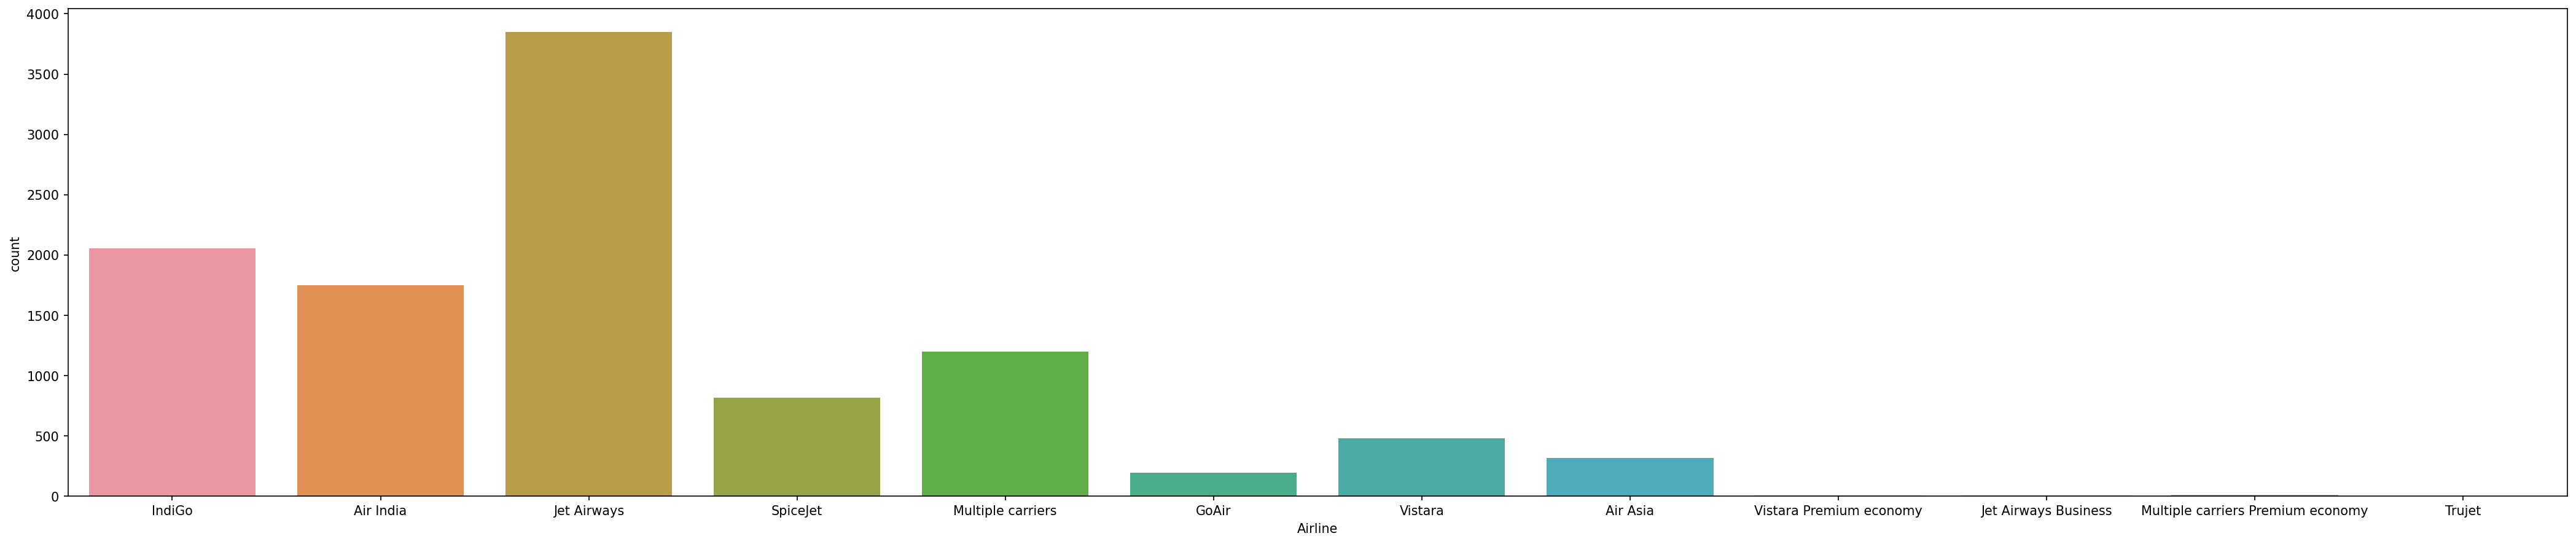

In [41]:
plt.figure(figsize=(35,7),dpi=150)
sns.countplot(train.Airline);

### Source :

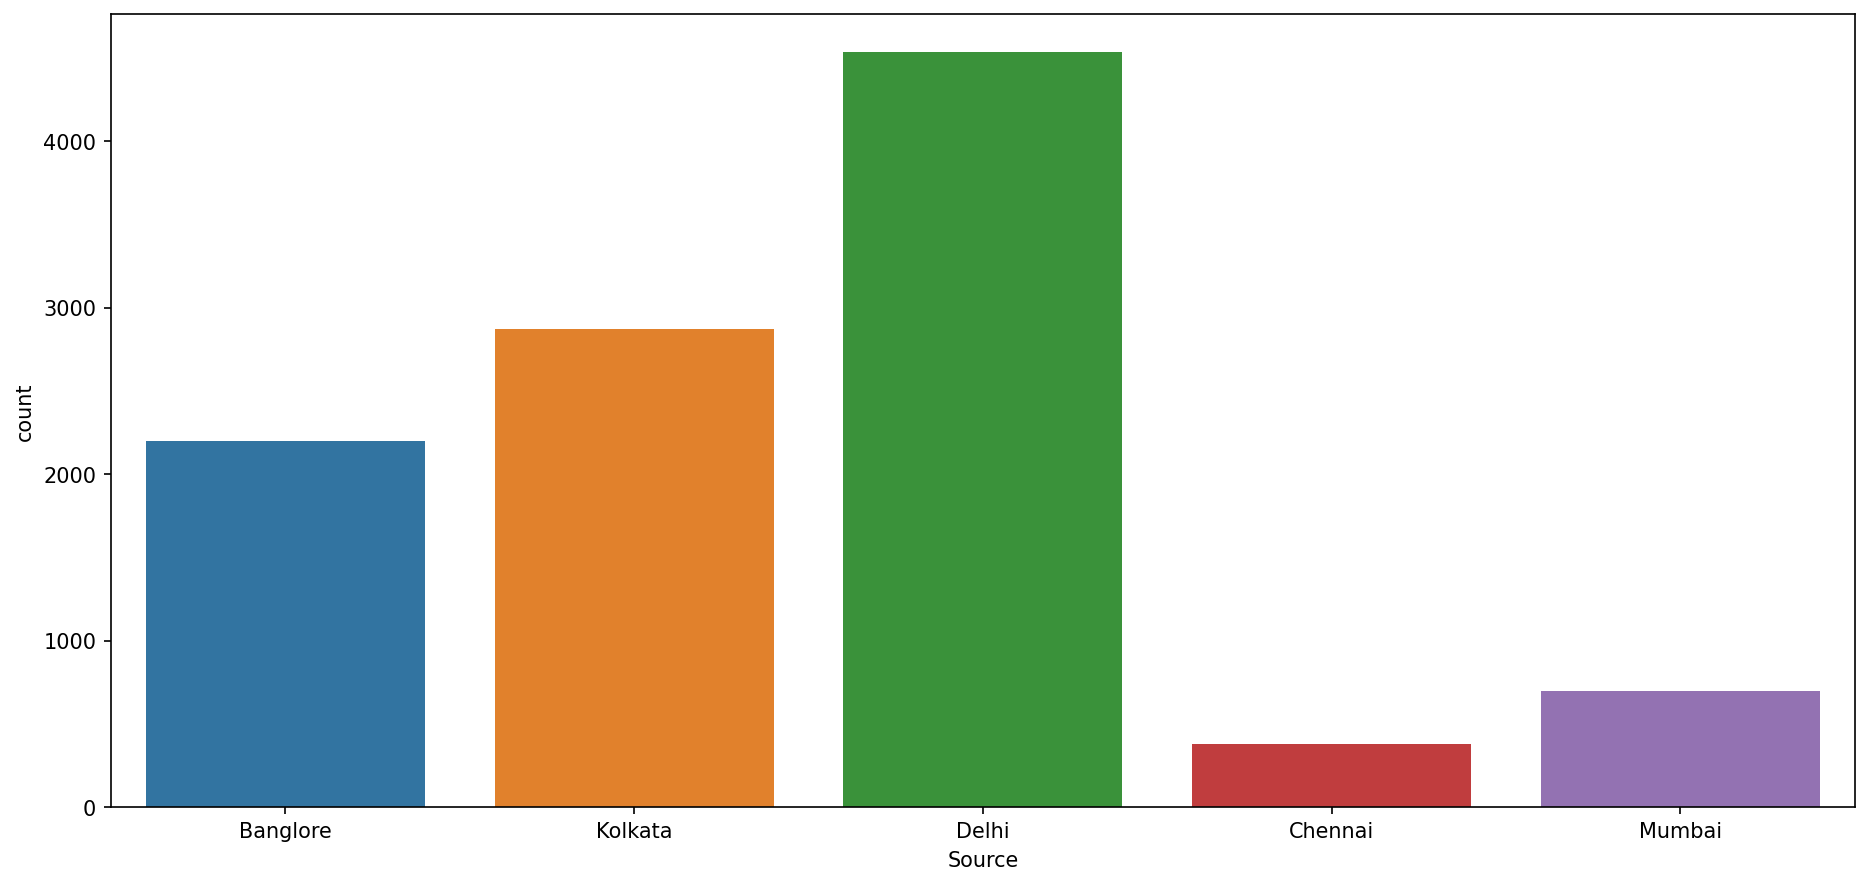

In [42]:
plt.figure(figsize=(15,7),dpi=150)
sns.countplot(train.Source);

### Destination :

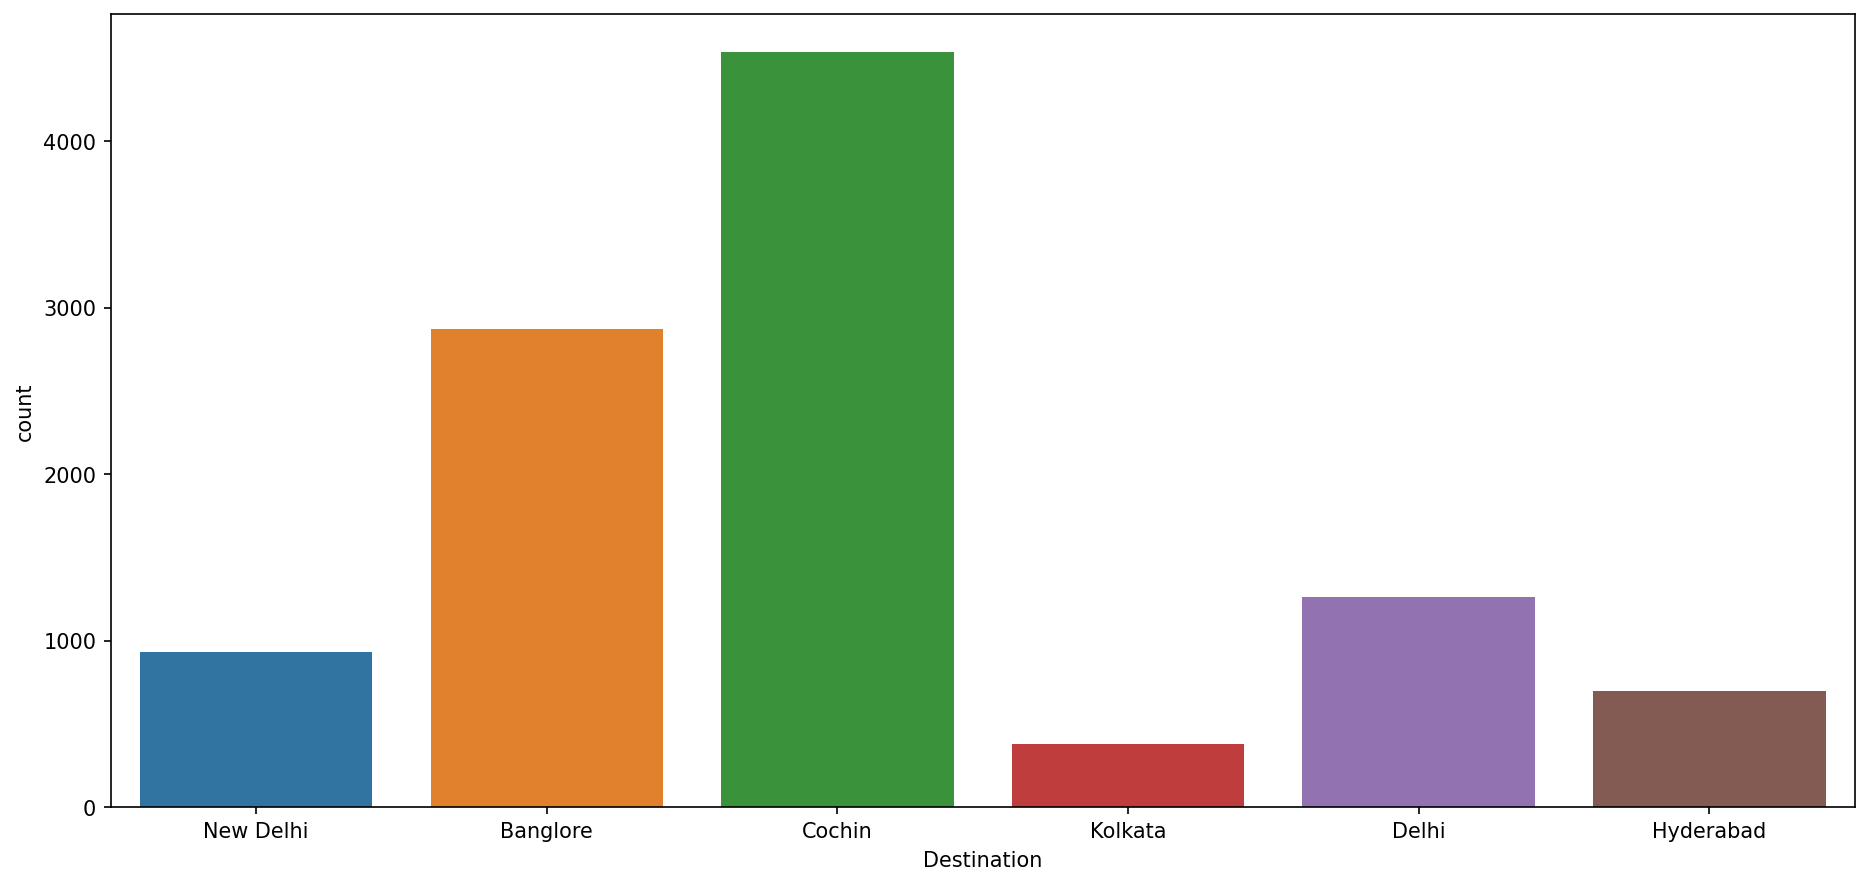

In [43]:
plt.figure(figsize=(15,7),dpi = 150)
sns.countplot(train.Destination);

### Route :

In [46]:
plt.figure(figsize=(200,35),dpi=150)
sns.countplot(train.Route);

### Total_Stops :

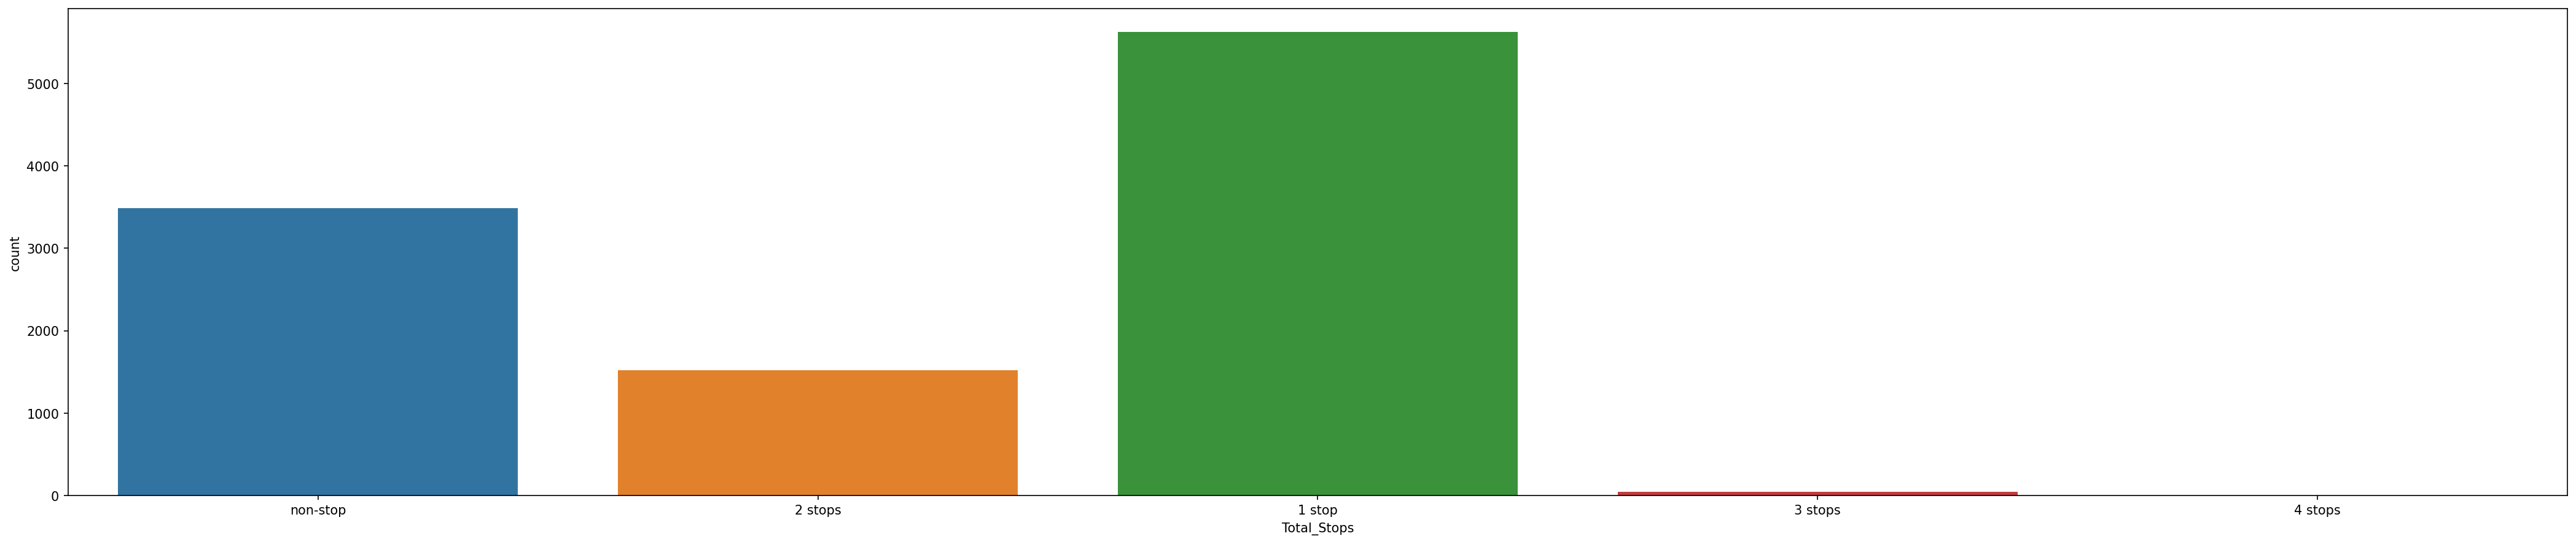

In [47]:
plt.figure(figsize=(35,7),dpi = 150)
sns.countplot(train.Total_Stops);


### Additional_Info :

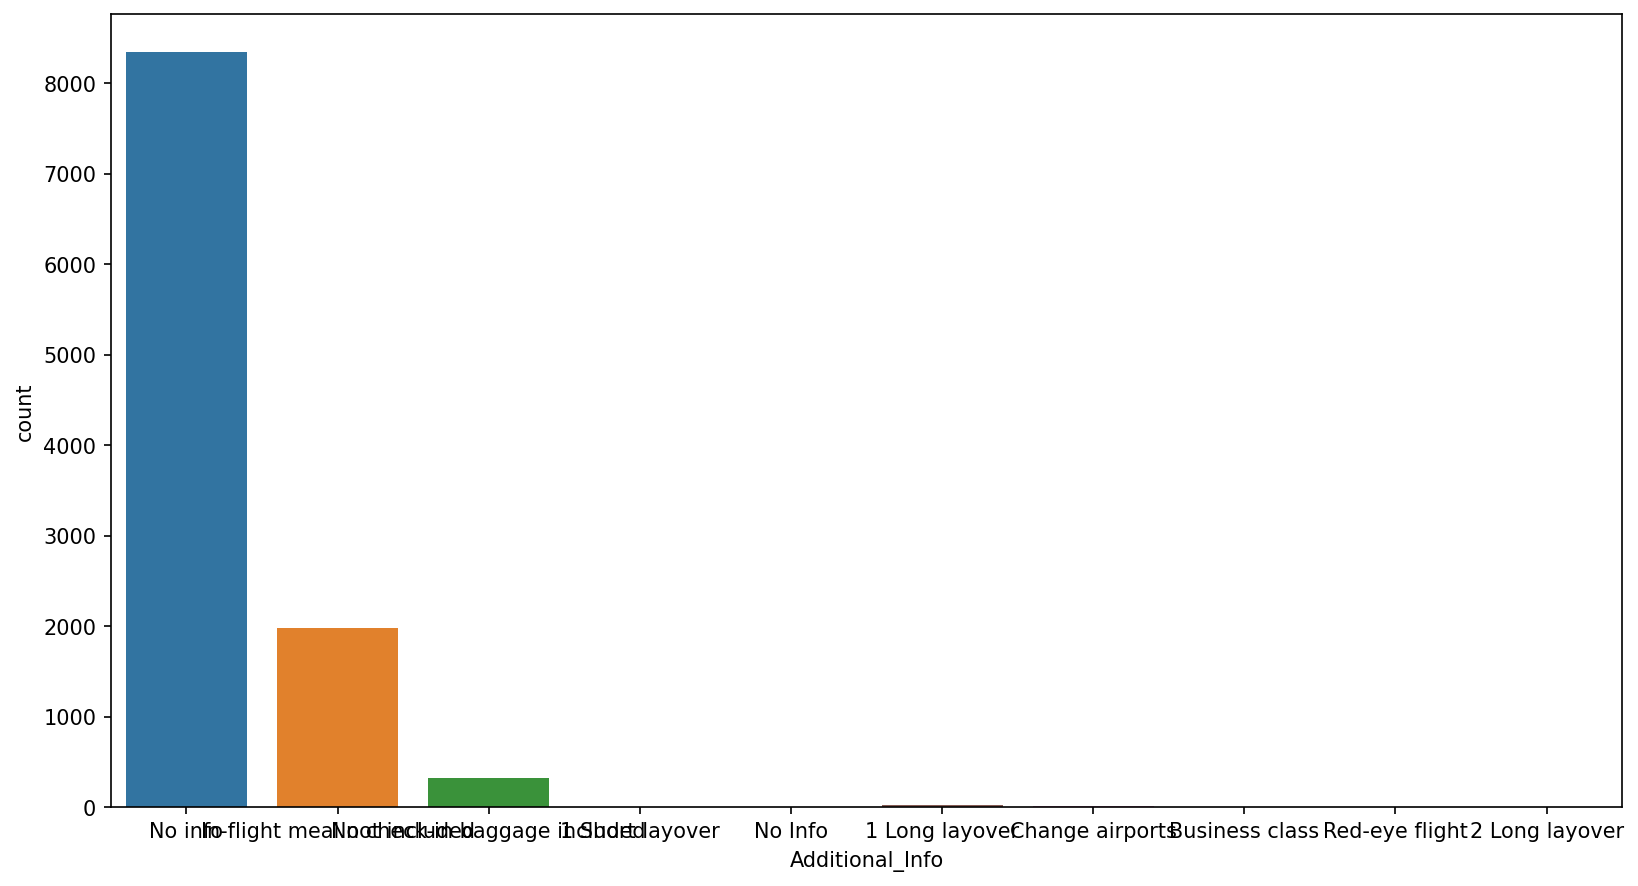

In [48]:
plt.figure(figsize=(13,7),dpi = 150)
sns.countplot(train.Additional_Info);

### Price :

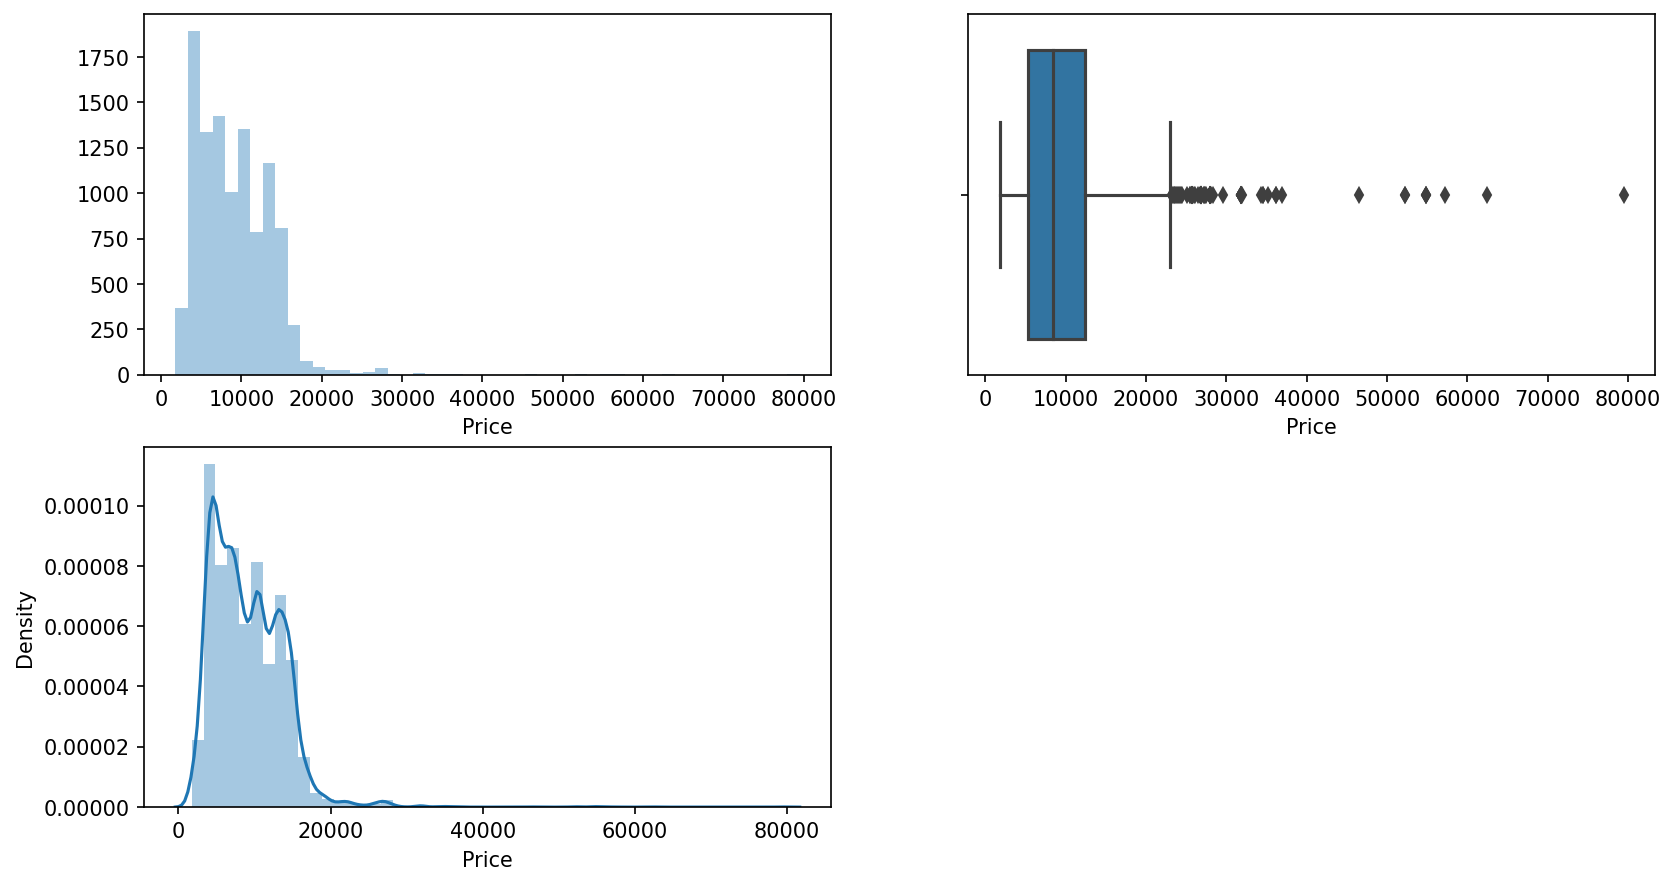

In [49]:
plt.figure(figsize=(13,7),dpi=150)
plt.subplot(2,2,1)
sns.distplot(train['Price'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train['Price']);
plt.subplot(2,2,3)
sns.distplot(train['Price']);

### Journey Day :

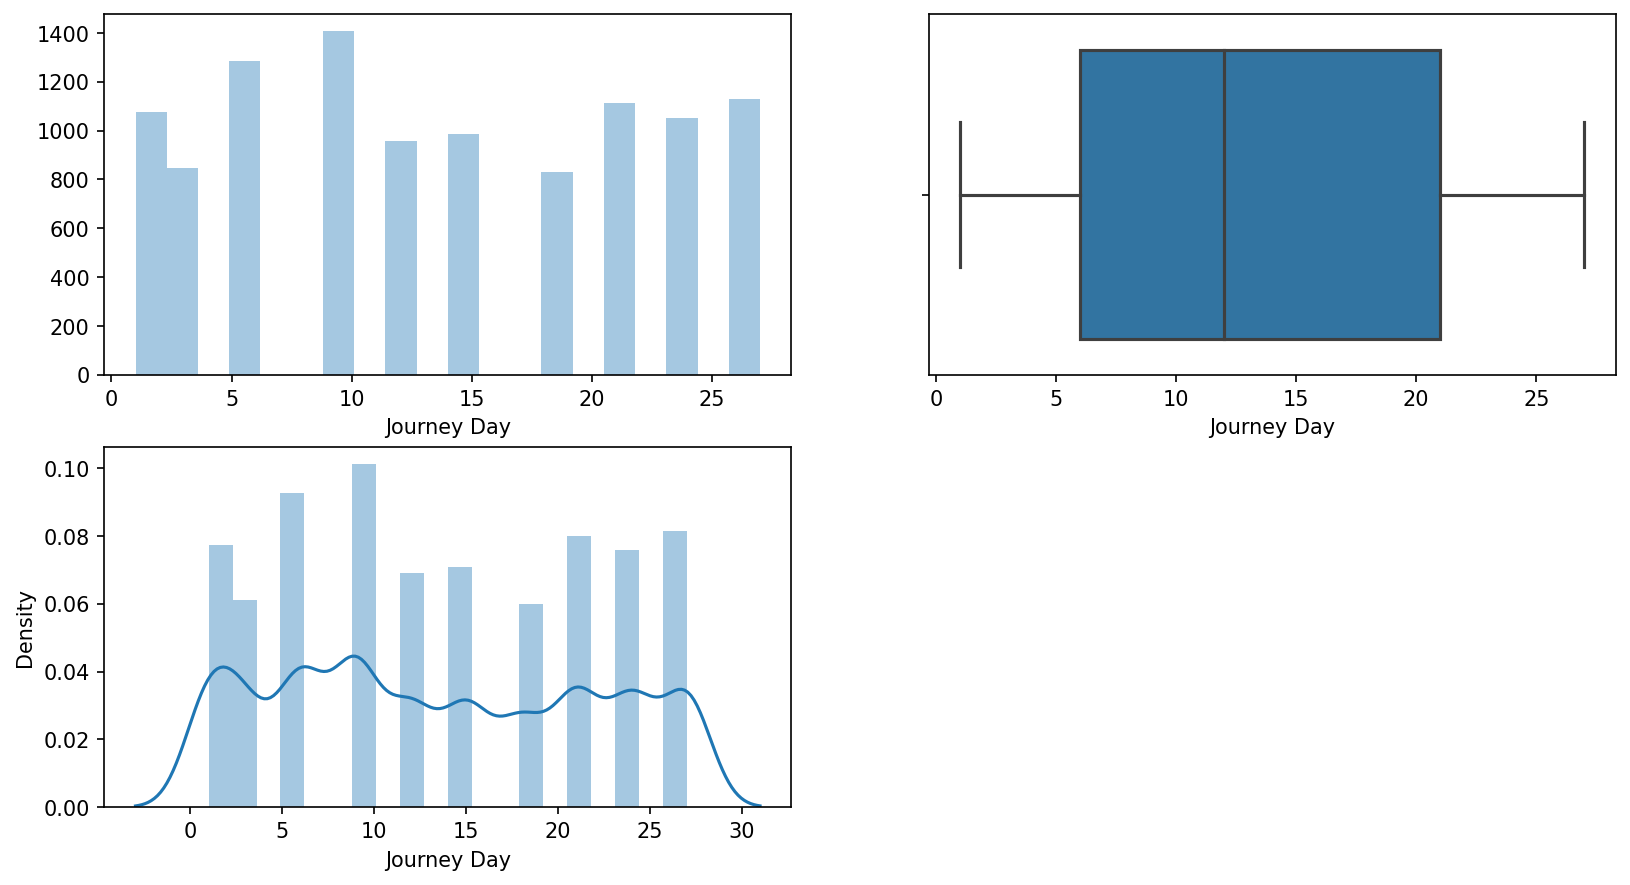

In [50]:
plt.figure(figsize=(13,7),dpi=150)
plt.subplot(2,2,1)
sns.distplot(train['Journey Day'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train['Journey Day']);
plt.subplot(2,2,3)
sns.distplot(train['Journey Day']);

### Journey Month :

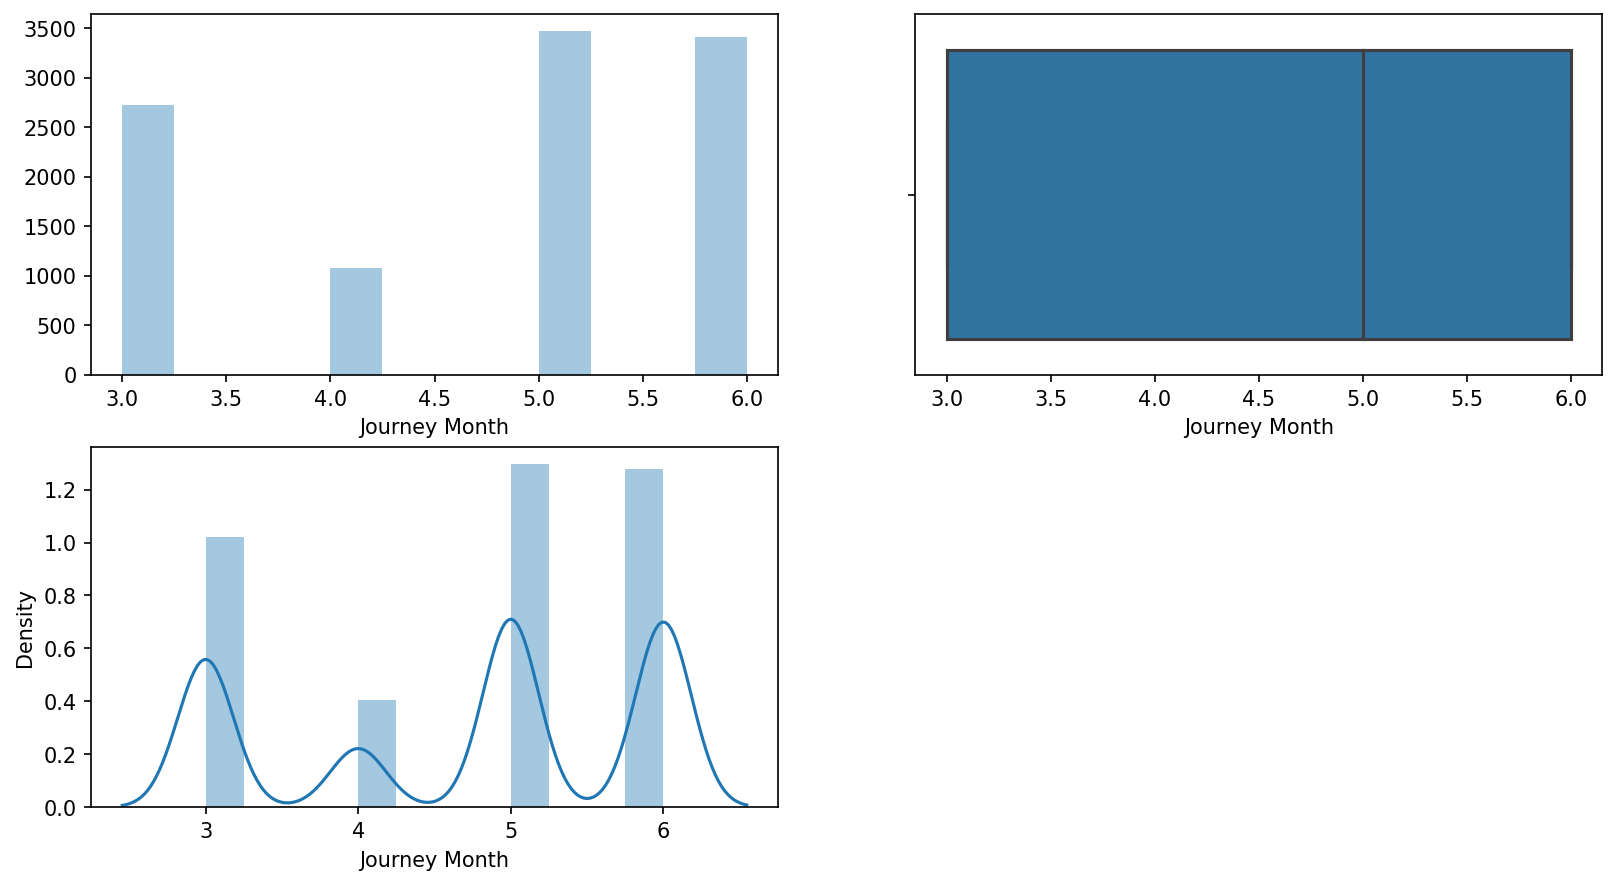

In [51]:
plt.figure(figsize=(13,7),dpi=150)
plt.subplot(2,2,1)
sns.distplot(train['Journey Month'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train['Journey Month']);
plt.subplot(2,2,3)
sns.distplot(train['Journey Month']);

### Dep_hour :

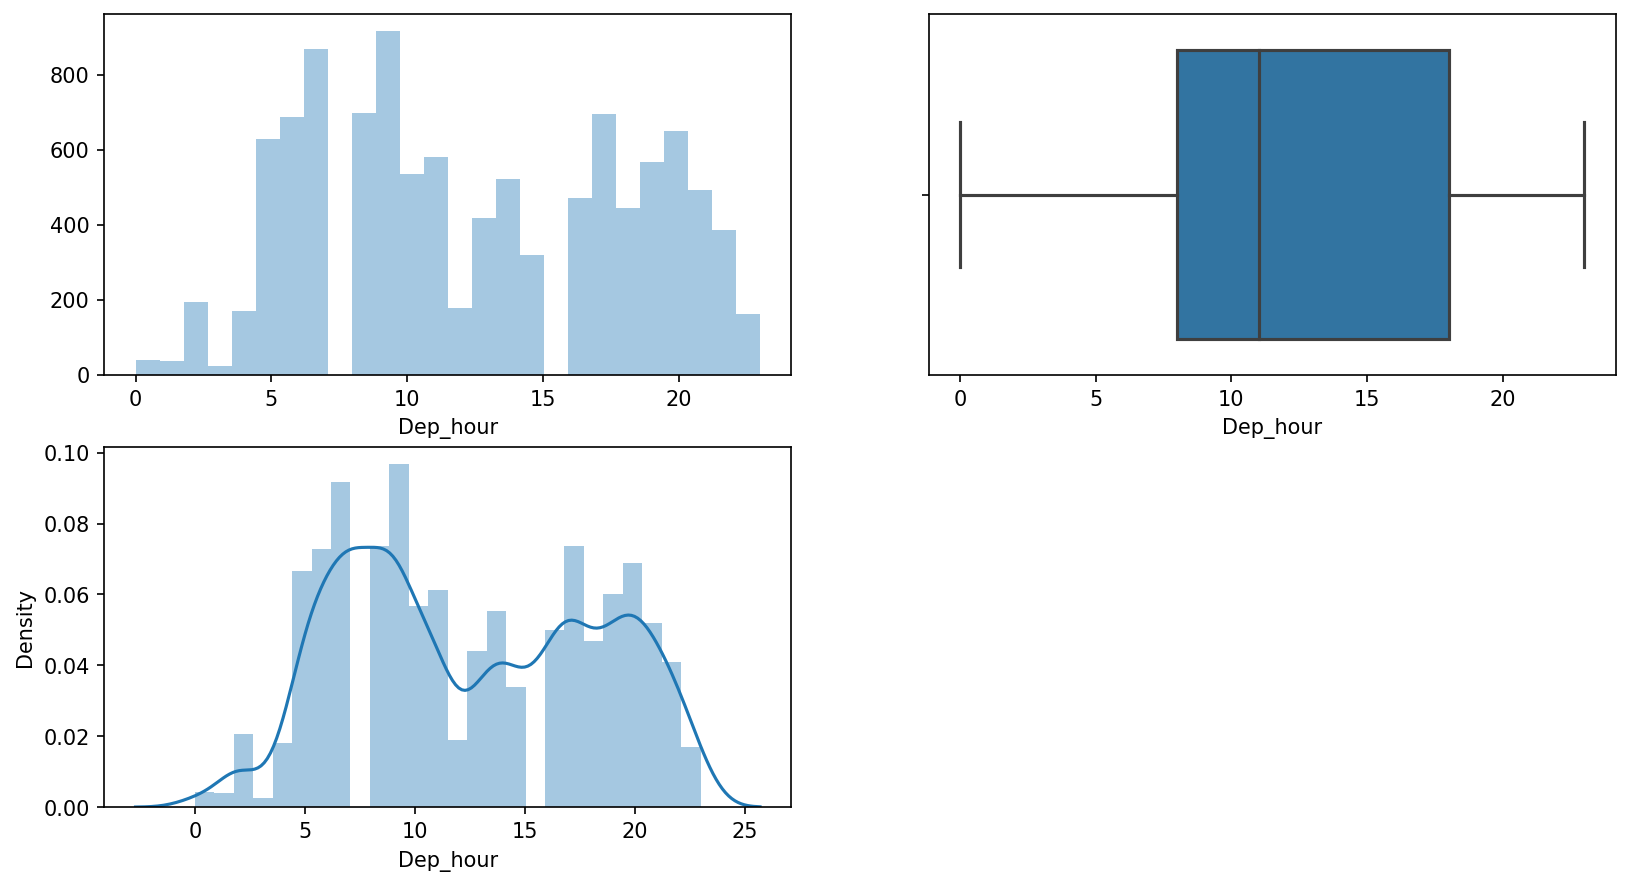

In [52]:
plt.figure(figsize=(13,7),dpi=150)
plt.subplot(2,2,1)
sns.distplot(train['Dep_hour'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train['Dep_hour']);
plt.subplot(2,2,3)
sns.distplot(train['Dep_hour']);

### Dep_min :

<AxesSubplot:xlabel='Dep_min', ylabel='Density'>

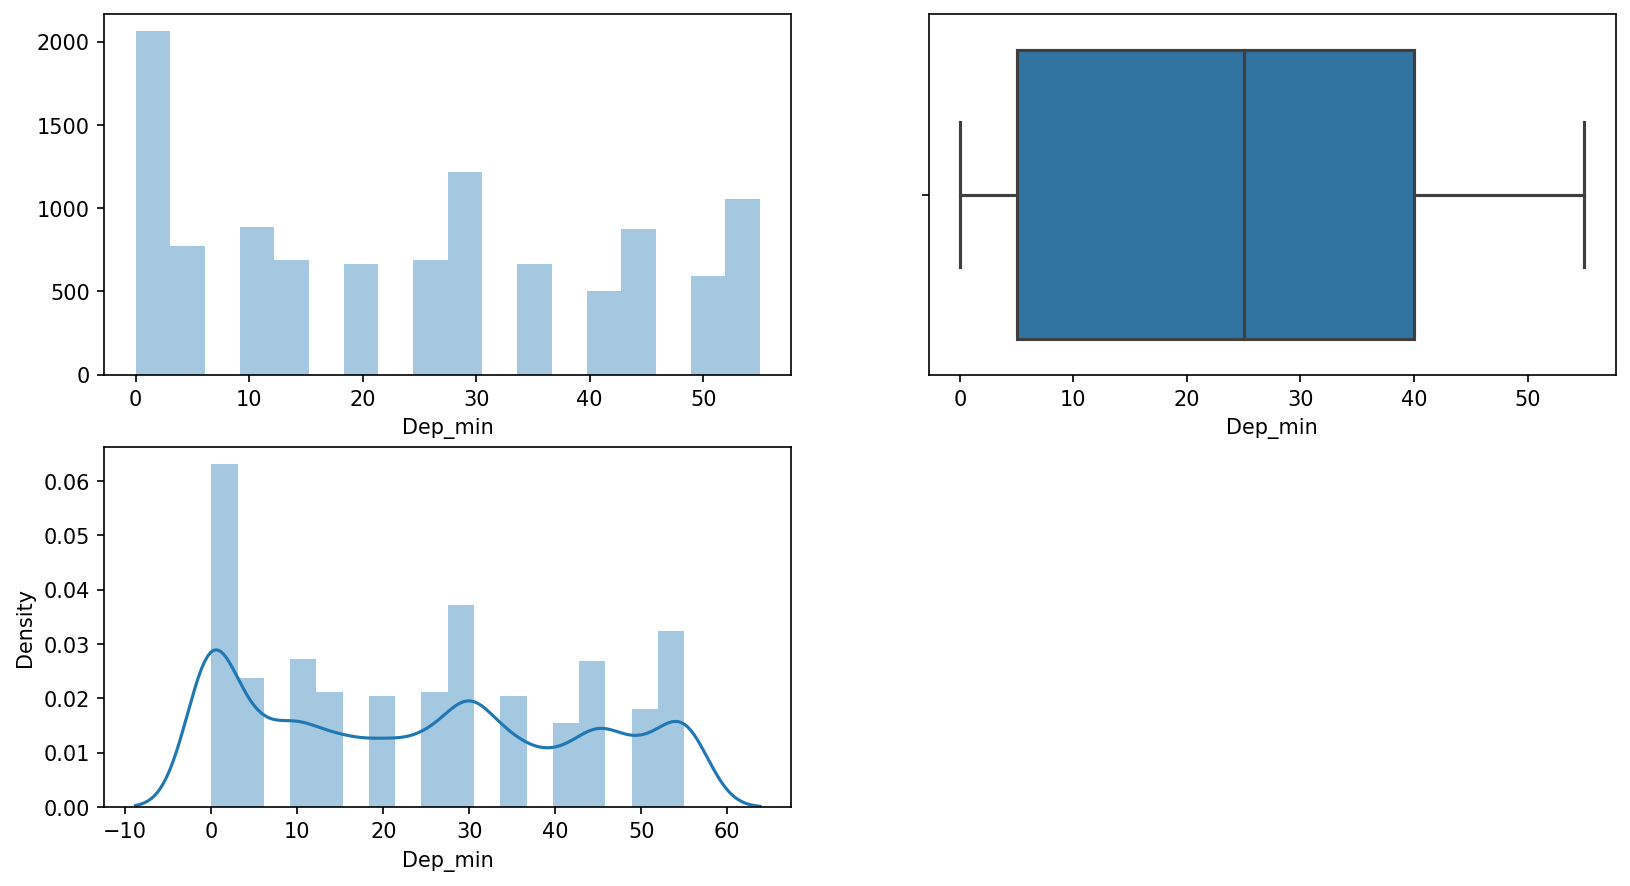

In [53]:
plt.figure(figsize=(13,7),dpi=150)
plt.subplot(2,2,1)
sns.distplot(train['Dep_min'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train['Dep_min']);
plt.subplot(2,2,3)
sns.distplot(train['Dep_min'])

### Arrival_hour :

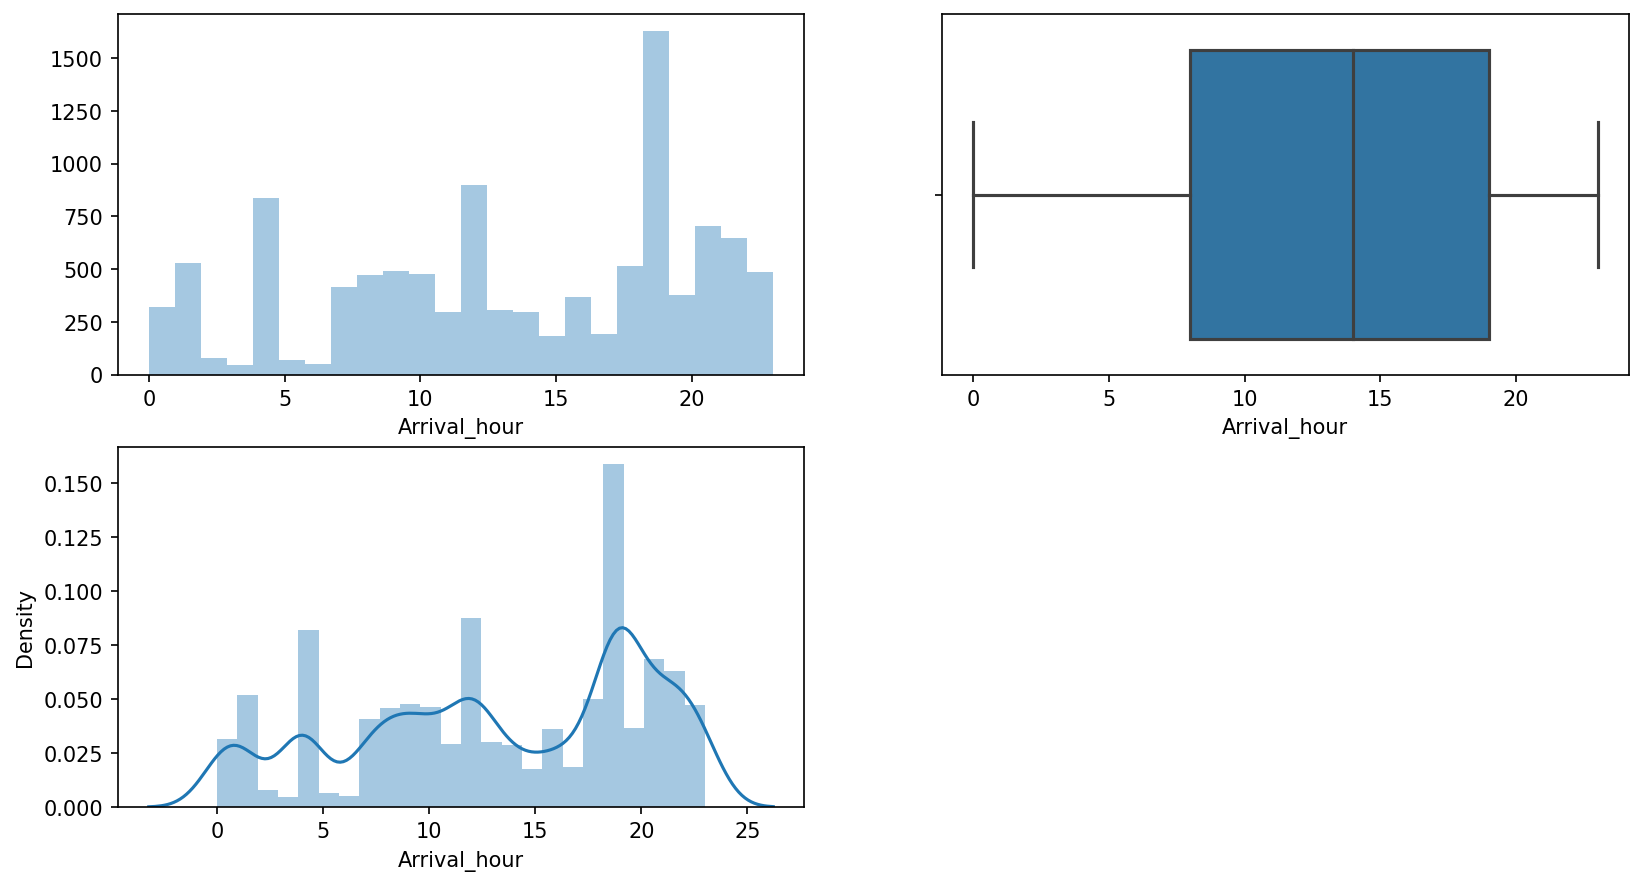

In [54]:
plt.figure(figsize=(13,7),dpi=150)
plt.subplot(2,2,1)
sns.distplot(train['Arrival_hour'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train['Arrival_hour']);
plt.subplot(2,2,3)
sns.distplot(train['Arrival_hour']);

### Arrival_minutes :

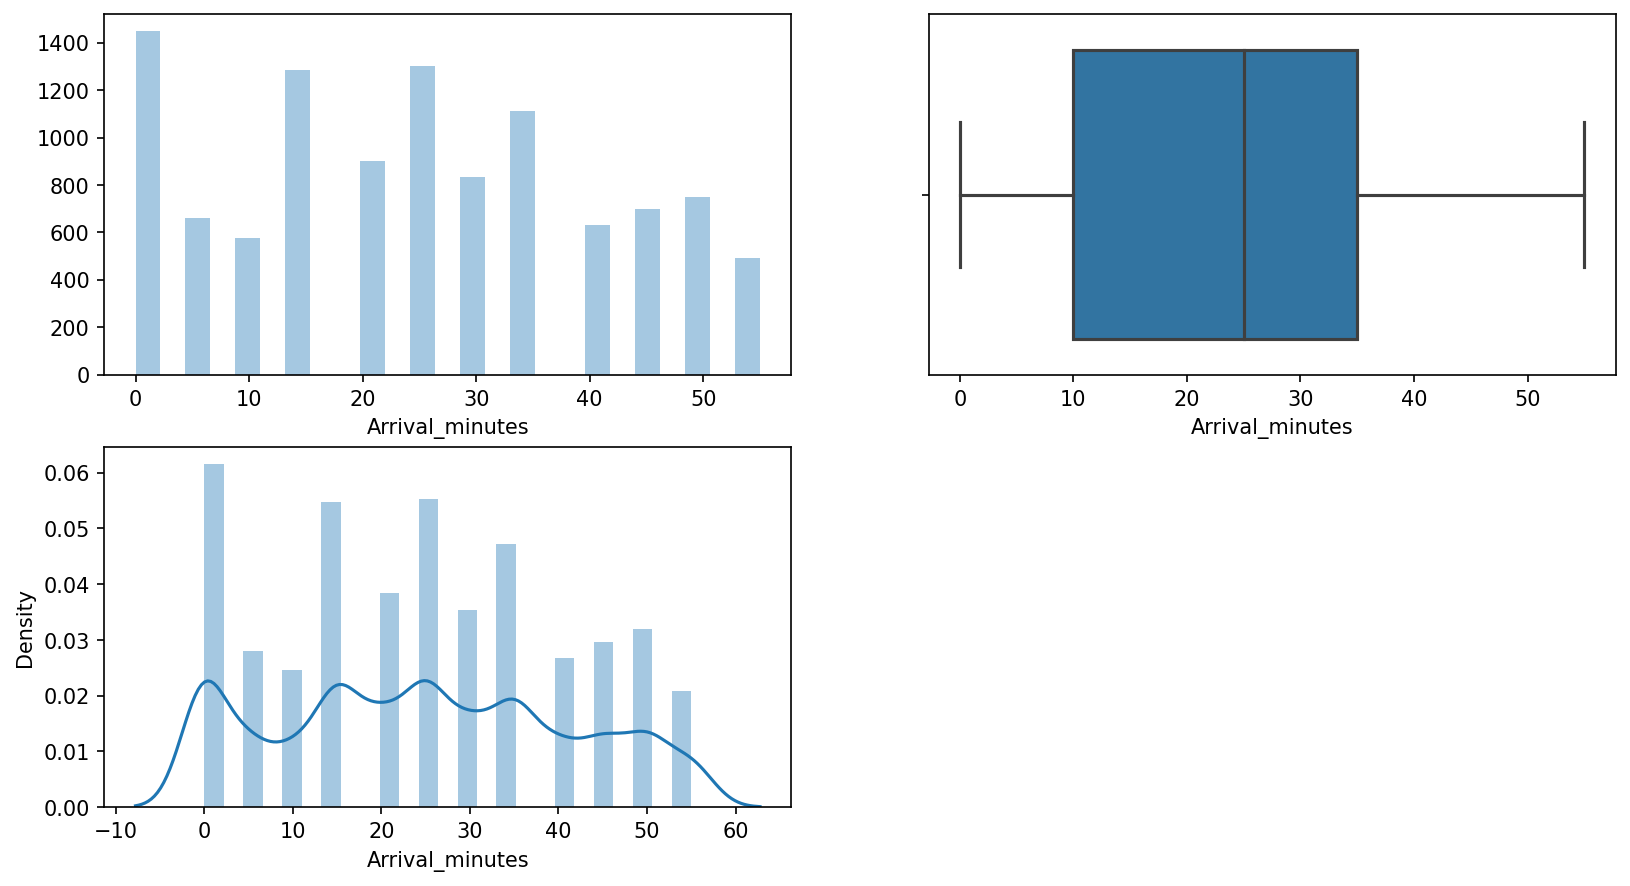

In [56]:
plt.figure(figsize=(13,7),dpi=150)
plt.subplot(2,2,1)
sns.distplot(train['Arrival_minutes'], kde=False);
plt.subplot(2,2,2)
sns.boxplot(train['Arrival_minutes']);
plt.subplot(2,2,3)
sns.distplot(train['Arrival_minutes']);

### Duration_hours :

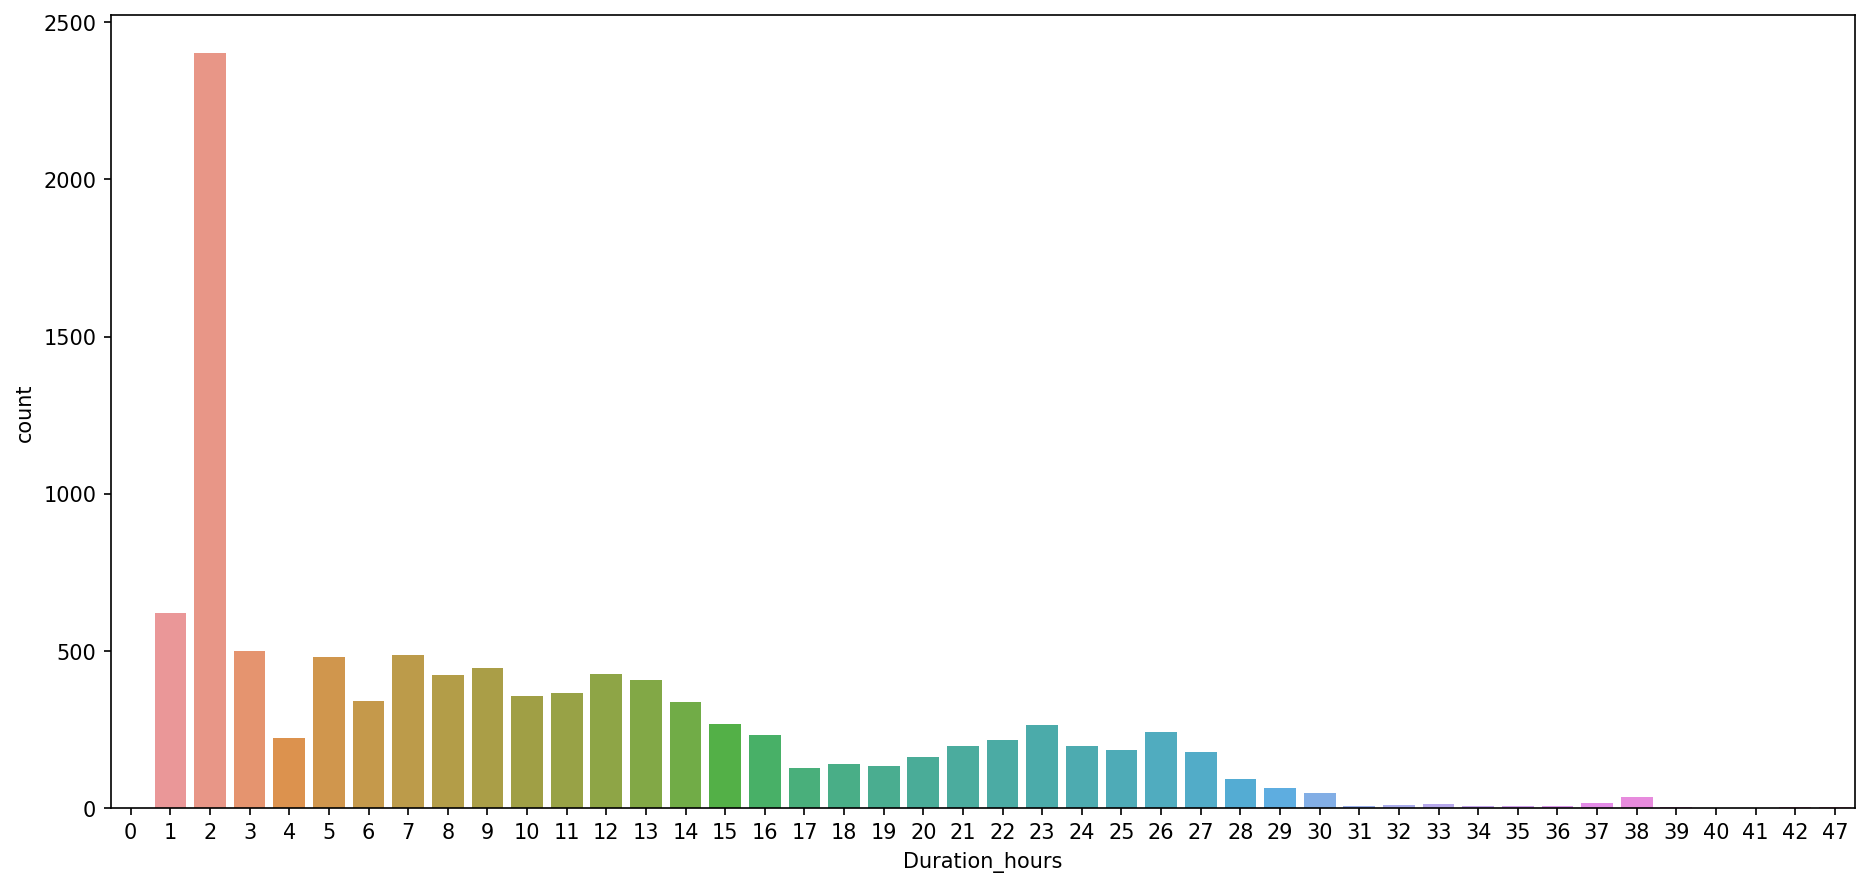

In [58]:
plt.figure(figsize=(15,7),dpi = 150)
sns.countplot(train.Duration_hours);

### Duration_mins :

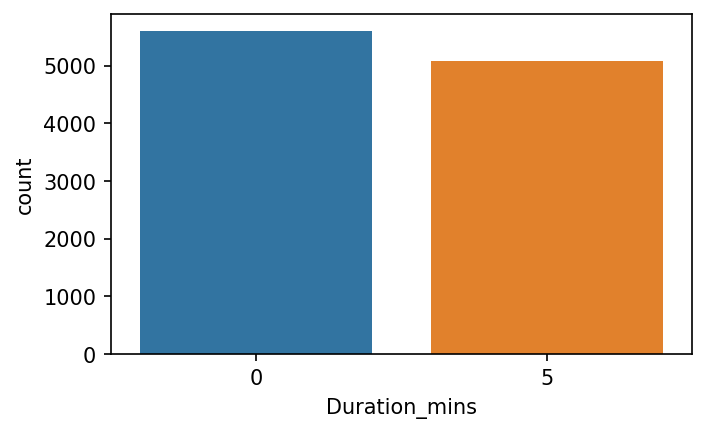

In [59]:
plt.figure(figsize=(5,3),dpi = 150)
sns.countplot(train.Duration_mins);

Along with the "Bivariate Analysis" I will also handle the categorical data through "Nominal encoder - One hot encoding" .

### Bivariate Analysis :

#### Airline :

<AxesSubplot:xlabel='Price', ylabel='Airline'>

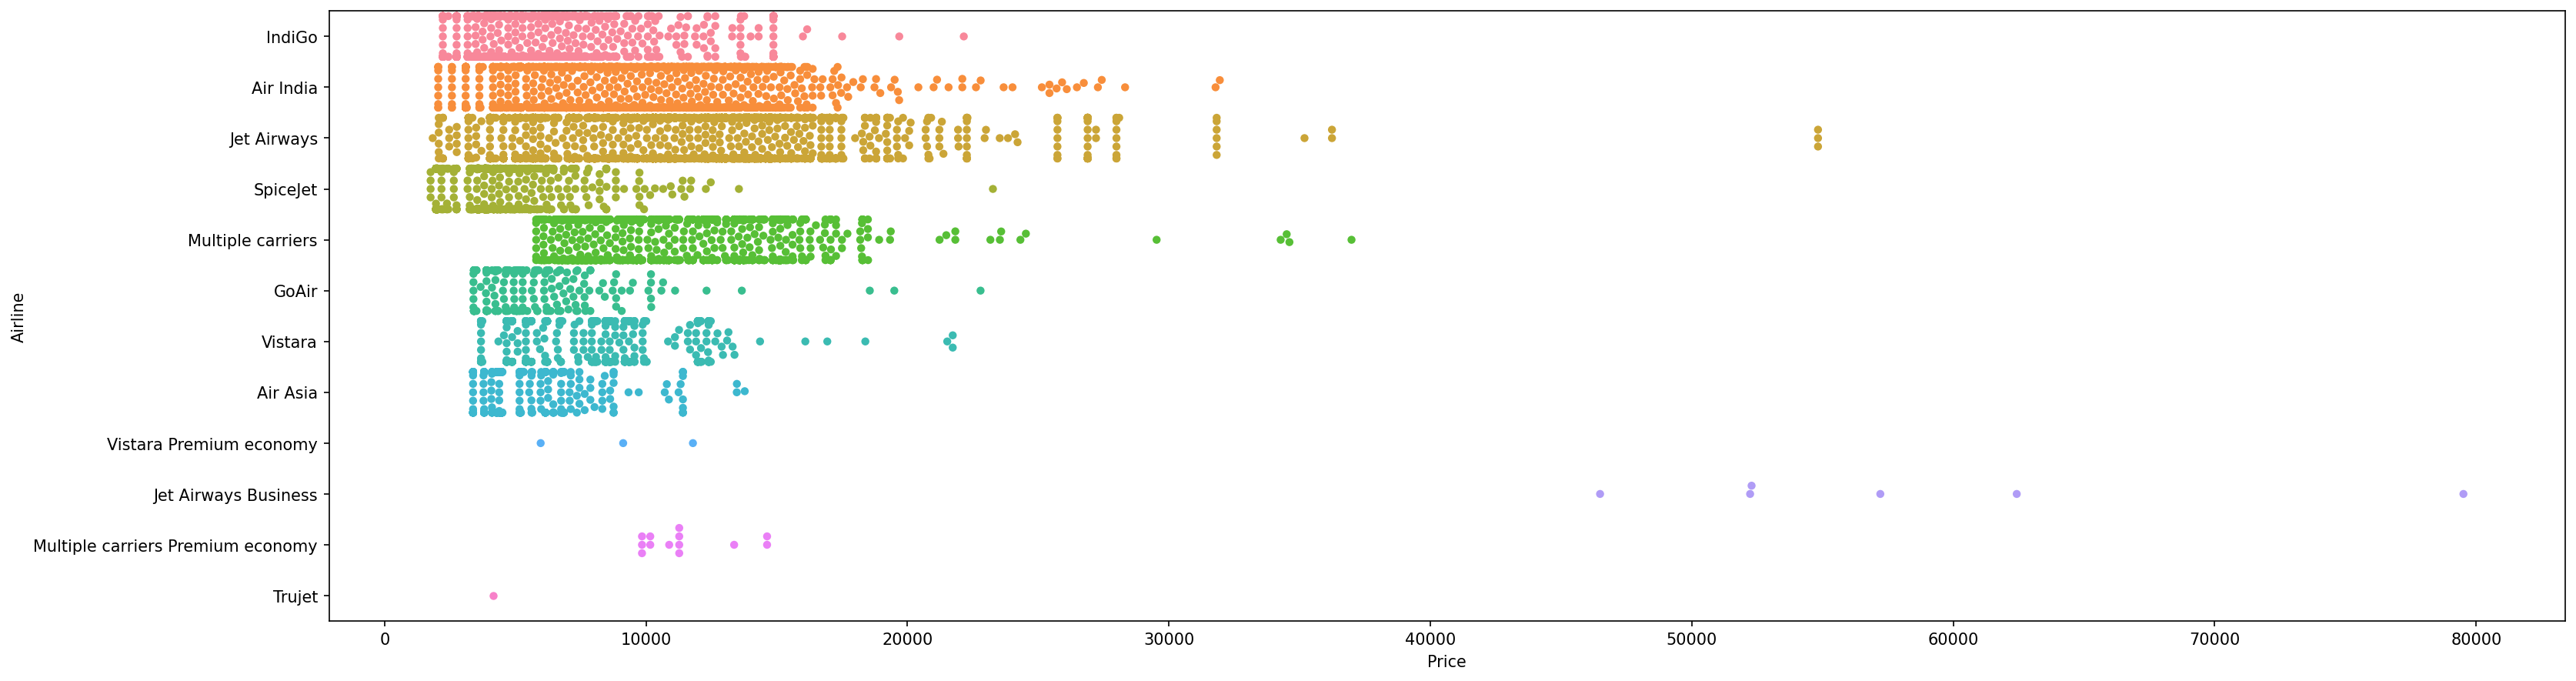

In [60]:
plt.figure(figsize = (25,7),dpi=150)
sns.swarmplot(x = 'Price', y = 'Airline', data = train)

I can see that the almost all the companies starts their Airline fare with around less than 5000 but in among all these categories I can see that there is company "Multiple carriers" in which the Airline fare starts with more than 5000 but less than 10000, which means the distribution among all the categories is almost same .

In [61]:
train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

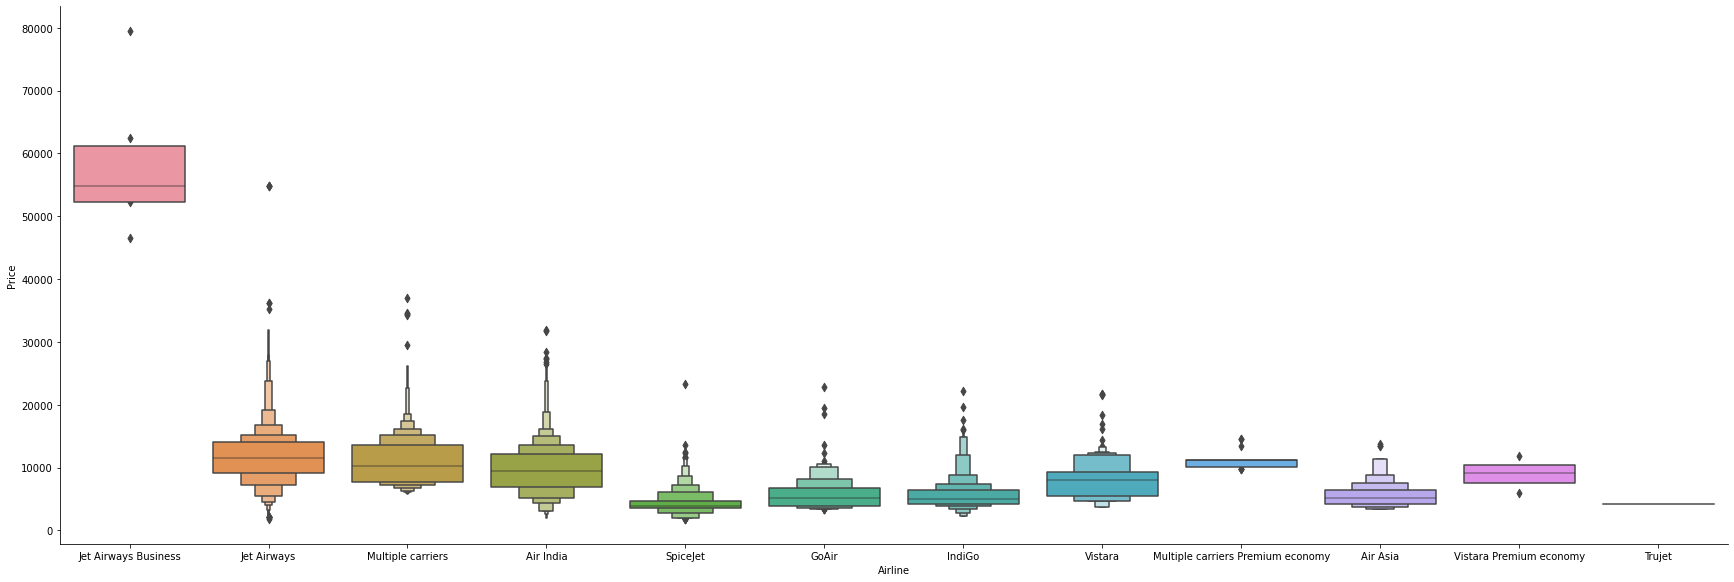

In [62]:
sns.catplot(y = "Price", x = "Airline" , data = train.sort_values("Price", ascending = False), kind = "boxen" , height = 8 , aspect = 3)
plt.show()

I can see that the highest price is for the company "Jet Airways Business " remaning companies prices are almost same .

In [63]:
Airline = train[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0  
4               0                0                                0

I have deleted the original column and the generated columns are presented here . 

### Source :

<AxesSubplot:xlabel='Price', ylabel='Source'>

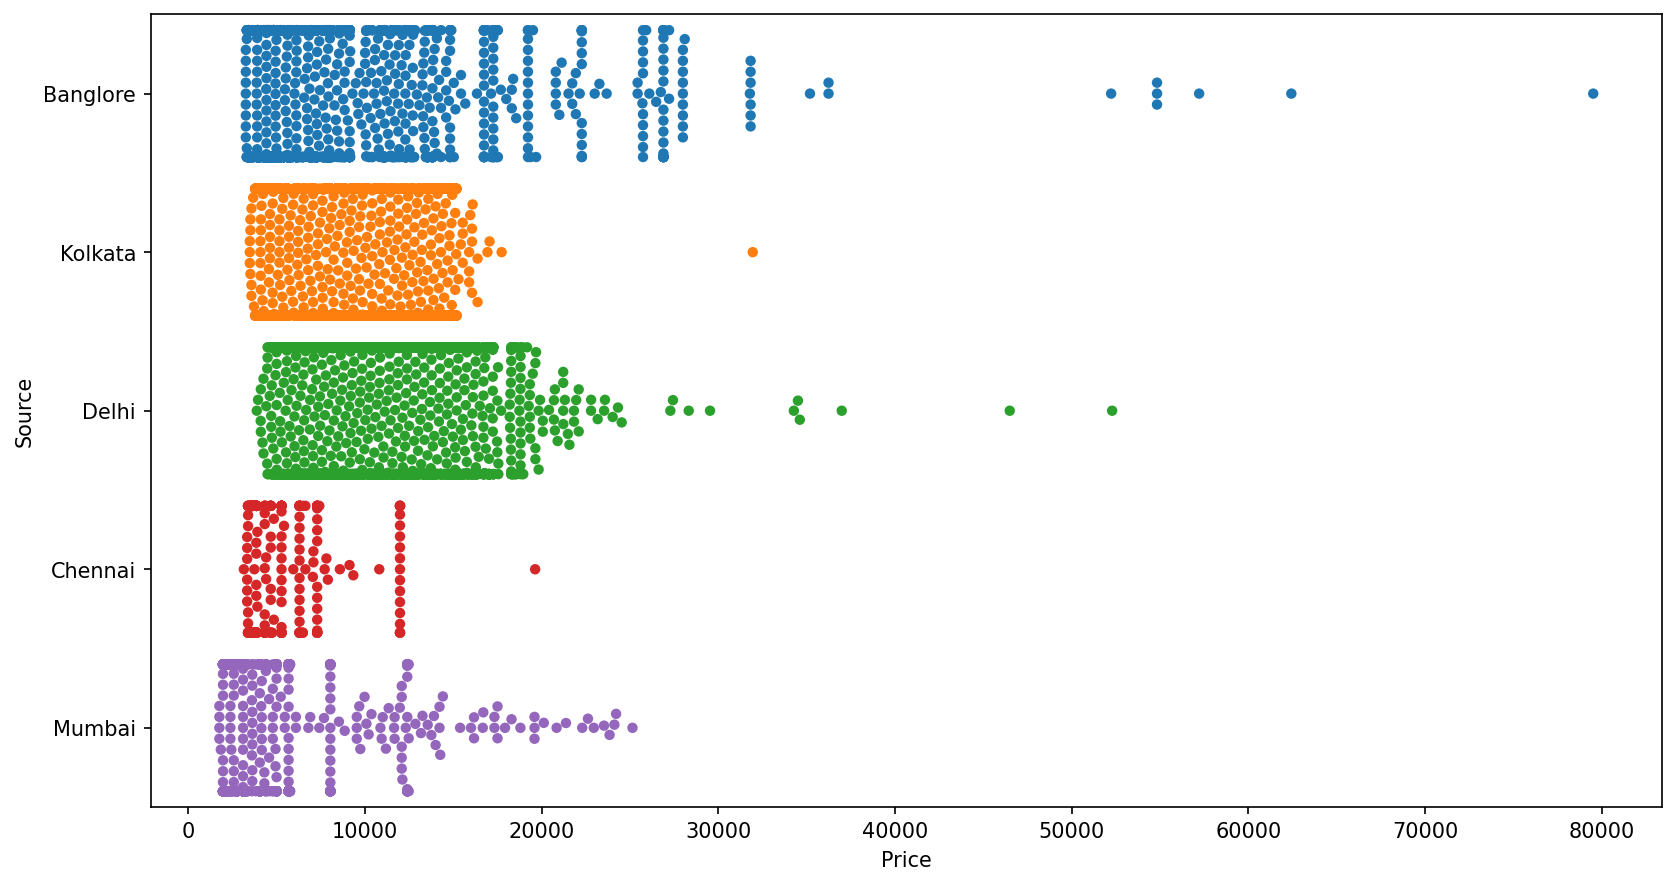

In [65]:
plt.figure(figsize = (13,7),dpi=150)
sns.swarmplot(x = 'Price', y = 'Source', data = train)

I can see that the states with flight prices range almost same in all the states except in the states "Mumbai" and "Chennai" of that Mumbai has lesser flight prices range when compared with "Chennai" .

In [66]:
train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

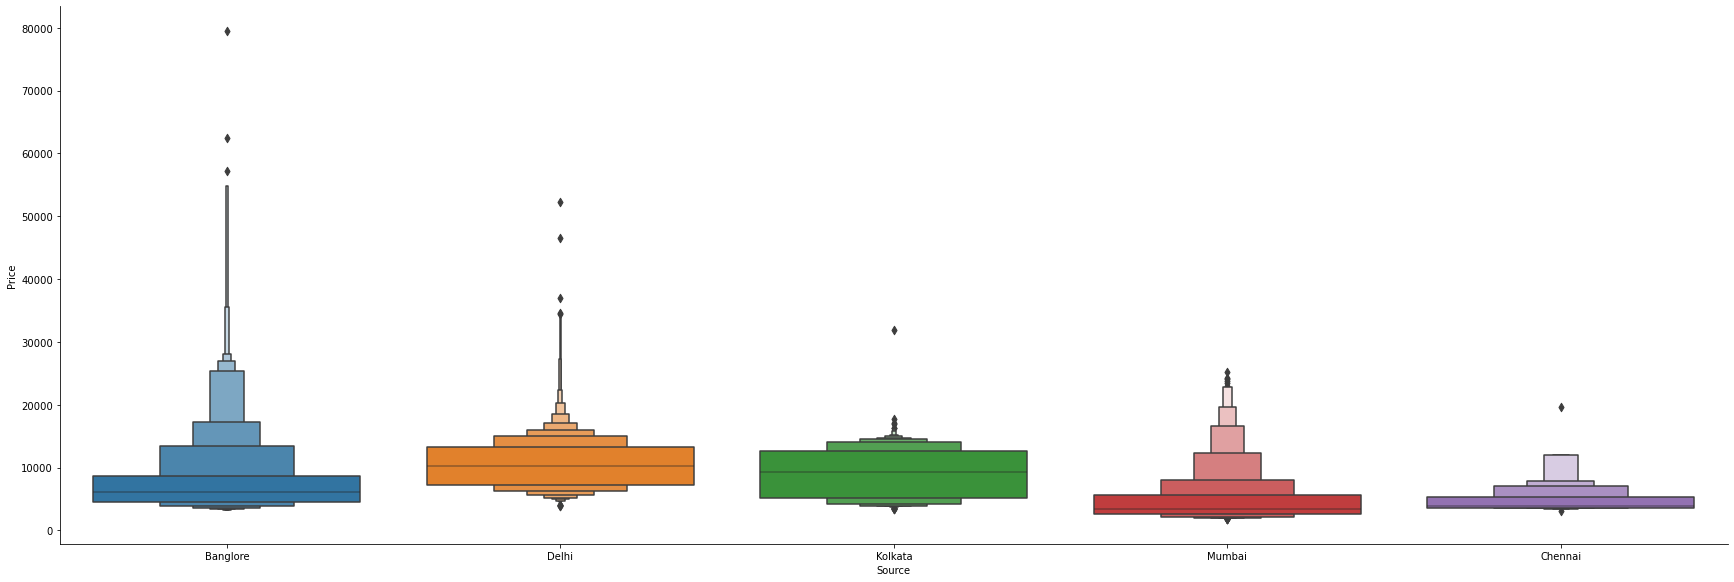

In [67]:
sns.catplot(y = "Price", x = "Source" , data = train.sort_values("Price", ascending = False), kind = "boxen" , height = 8 , aspect = 3)
plt.show()

I can see that the column has outliers present in them but among all the other categories "Bangalore" has more number of outliers .

In [68]:
Source = train[["Source"]]
Source = pd.get_dummies(Source , drop_first = True)
Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

I can see that I have deleted the original column "Source" and I have generated the dummy columns.

### Destination :

<AxesSubplot:xlabel='Price', ylabel='Destination'>

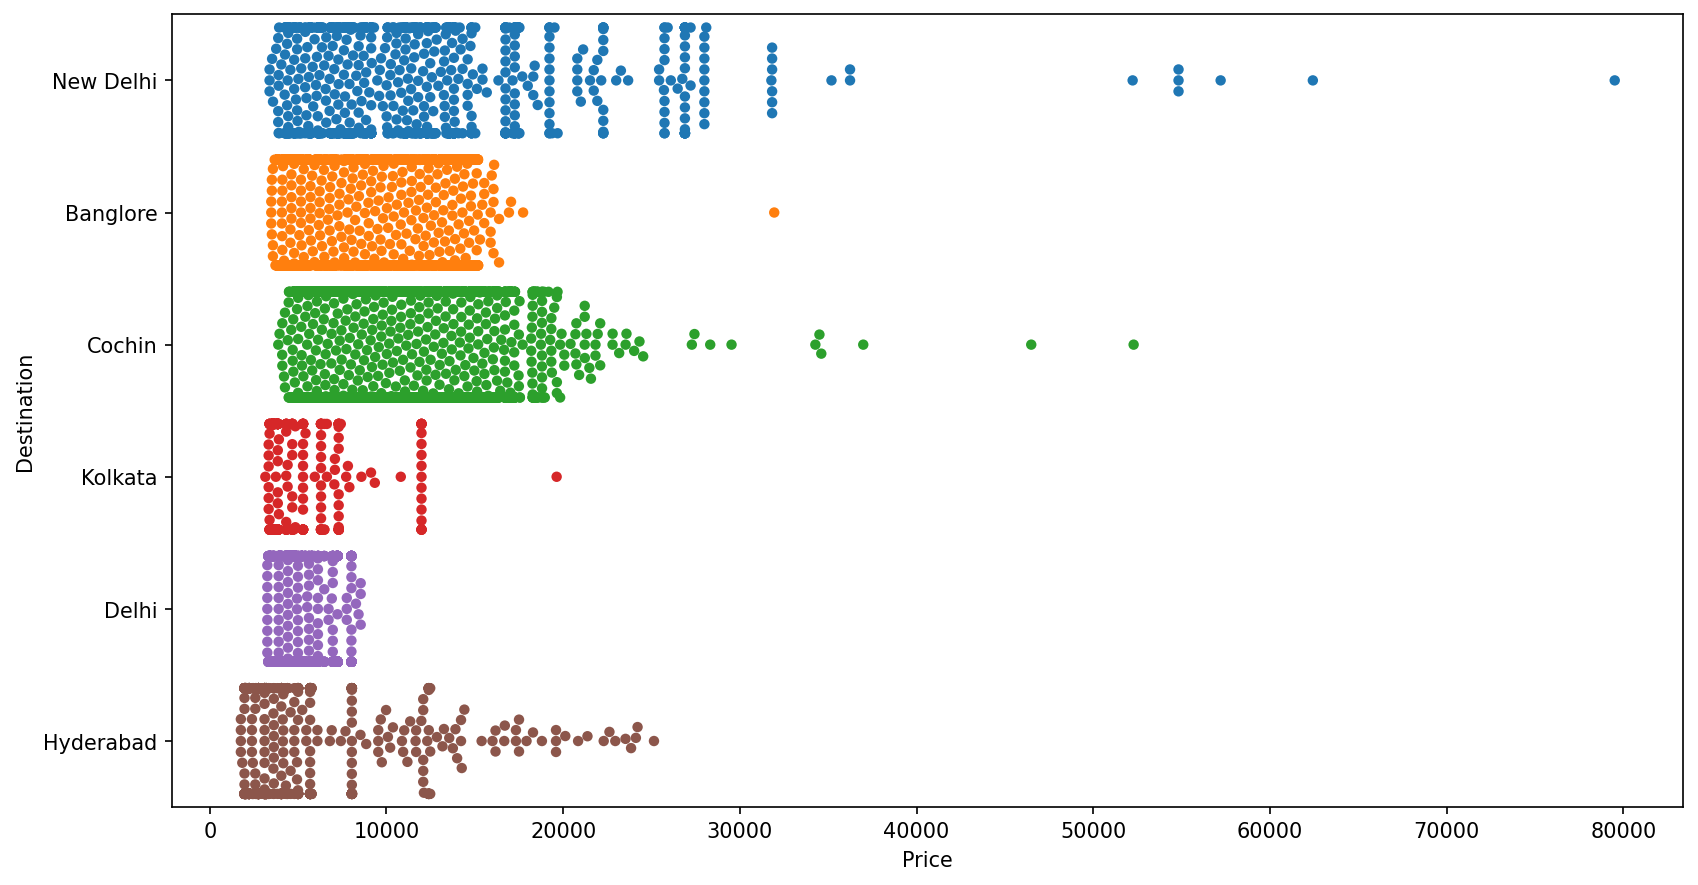

In [69]:
plt.figure(figsize = (13,7),dpi=150)
sns.swarmplot(x = 'Price', y = 'Destination', data = train)

i. I can see that the column with Destination :- "Cochin" , "Bangalore","Newdelhi" have more number of passengers and also has highest price.

ii. I can see that the Destination which are with lesser flight prices also have less number of passengers and they are :-  "Kolkatta" , "Delhi" ,"Hyderabad".

In [70]:
train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

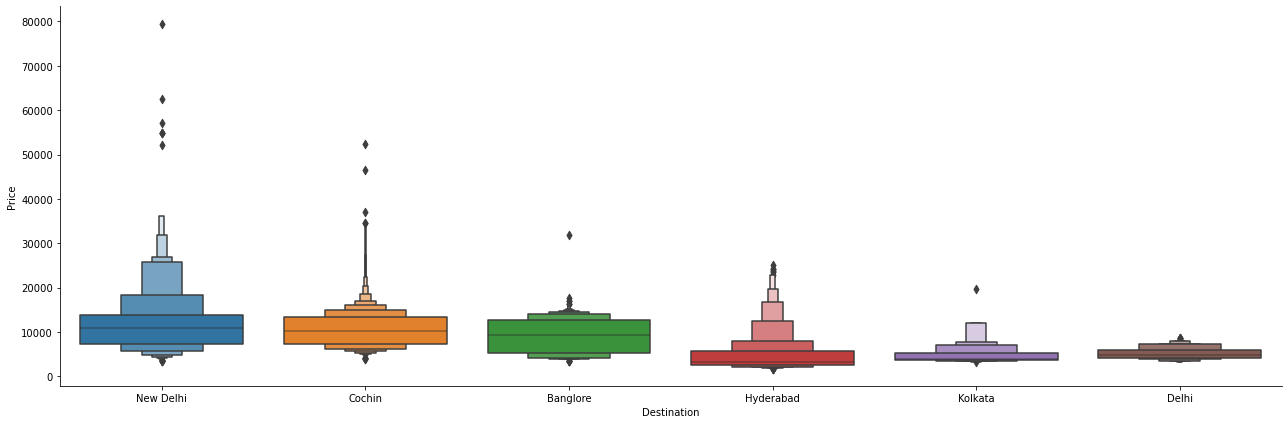

In [60]:
sns.catplot(y = "Price", x = "Destination" , data = train.sort_values("Price", ascending = False), kind = "boxen" , height = 8 , aspect = 3)
plt.show()

I can see that the category "New Delhi" has more number of outliers than any other categories of the column .

In [72]:
Destination = train[["Destination"]]

Destination = pd.get_dummies(Destination , drop_first = True)

Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

I can see that the original column is deleted and I have generated the new columns which will have information of the original column in a required manner.

In [73]:
train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [74]:
train["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

I can see that the columns are with similar information just the difference is that one column has object type and the other is with numerical, So I can delete any of the column out of the both.

In [75]:
train["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

I can see that most of the data present in the column "Additional_Info" is "No-info". So, I can delete this column and proceed with our model building.

In [76]:
train.drop(["Route" , "Additional_Info"] , axis = 1 , inplace = True)

In [77]:
train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [78]:
train.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4} , inplace = True)

In [79]:
data = pd.concat([train, Airline ,Source , Destination] , axis = 1) 

In [80]:
data.head()

Airline    Source Destination  Total_Stops  Price  Journey Day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey Month  Dep_hour  Dep_min  Arrival_hour  Arrival_minutes  \
0              3        22       20             1               10   
1              5         5       50            13               15   
2              6         9       25             4               25   
3              5        18        5            23               30   
4              3        16       50            21               35   

   Duration_hours  Duration_mins  Airline_Air India  Airline_GoAir  \
0               2              0                  0              0   
1               7              5                  1              0   
2              19              0                  0              0   
3               5              5                  0              0   
4               4              5                  0              0   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0               1                    0                             0   
1               0                    0                             0   
2               0                    1                             0   
3               1                    0                             0   
4               1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   
2                          0                                          0   
3                          0                                          0   
4                          0                                          0   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1

In [81]:
data.drop(["Airline" , "Source" , "Destination"], axis = 1 , inplace = True)

In [82]:
data.head()

Total_Stops  Price  Journey Day  Journey Month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_minutes  Duration_hours  Duration_mins  \
0             1               10               2              0   
1            13               15               7              5   
2             4               25              19              0   
3            23               30               5              5   
4            21               35               4              5   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [84]:
data.shape

(10682, 30)

In [85]:
data.columns

Index(['Total_Stops', 'Price', 'Journey Day', 'Journey Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_minutes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

### Total_Stops :

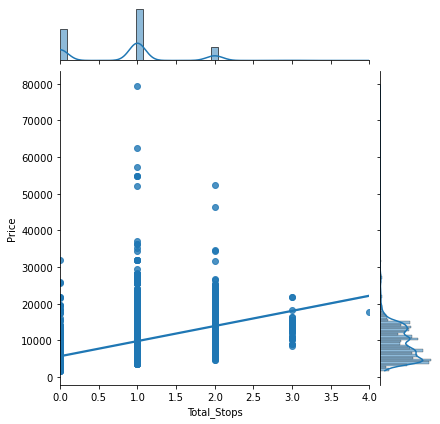

In [86]:
sns.jointplot(data=data, x='Total_Stops', y='Price', kind='reg');

I can see that the price was increasing with the increase in the number of stops .

### Journey Day :

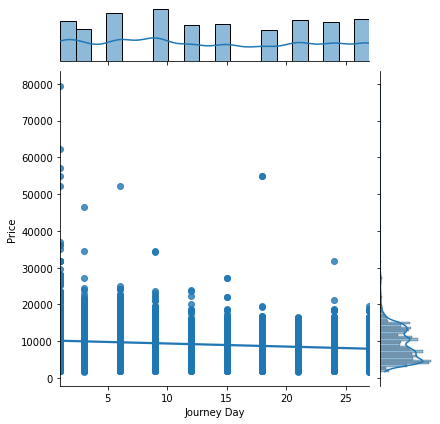

In [87]:
sns.jointplot(data=data, x='Journey Day', y='Price', kind='reg');

I can see that as there is increase in the number of days of the journey there is slight decrease in the price .

### Journey Month :

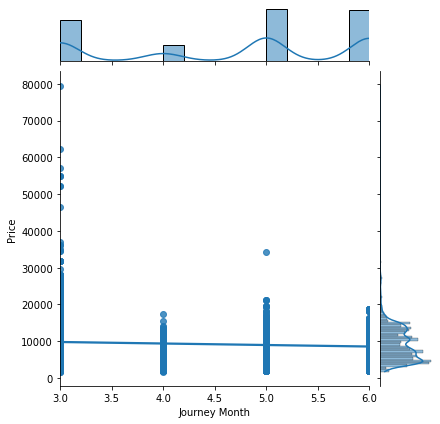

In [88]:
sns.jointplot(data=data, x='Journey Month', y='Price', kind='reg');

I can see that as the Journey month is increasing the price is more or less similar in all the months except in the 3rd month where the price reached to its peak .

### Dep_hour :

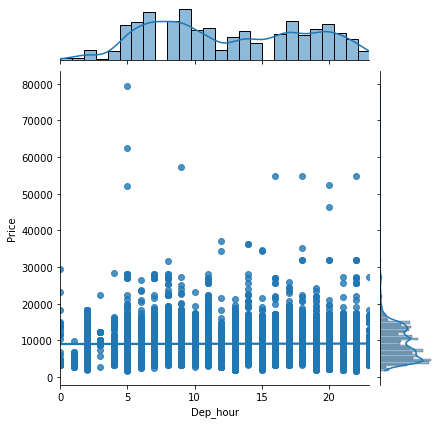

In [90]:
sns.jointplot(data=data, x='Dep_hour', y='Price', kind='reg');

I can see that as the departure hour is going on increasing there is more or less no change in the price and so probably at the 5th Departure hour the highest price reached.

### Dep_min : 

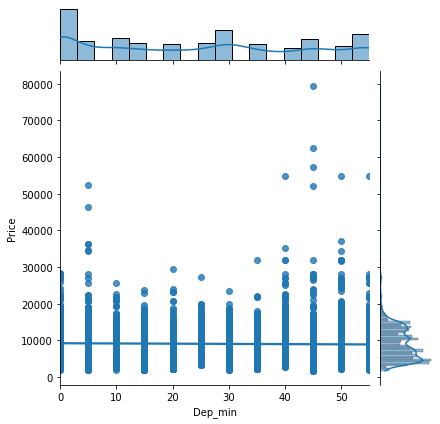

In [92]:
sns.jointplot(data=data, x='Dep_min', y='Price', kind='reg');

I can see that as the departure mins is going on increasing there is more or less no change in the price and the maximum price  reached in 45mins. 

### Arrival_hour :

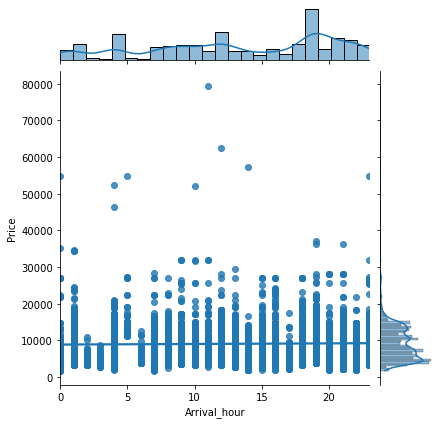

In [93]:
sns.jointplot(data=data, x='Arrival_hour', y='Price', kind='reg');

I can see that as the arrival hour is increasing there is more or less no change in the price but the maximum price reached in the arrival hour reached at the range between 10 - 15 .

### Arrival_minutes :

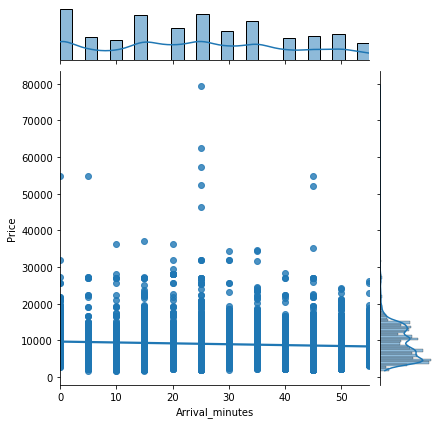

In [94]:
sns.jointplot(data=data, x='Arrival_minutes', y='Price', kind='reg');

I can see that as there is increase in the arrival minutes there is more or less no change in the price but the maximum price is reached in arrival minutes within a range between 20 - 30 minutes .

### Duration_hours :

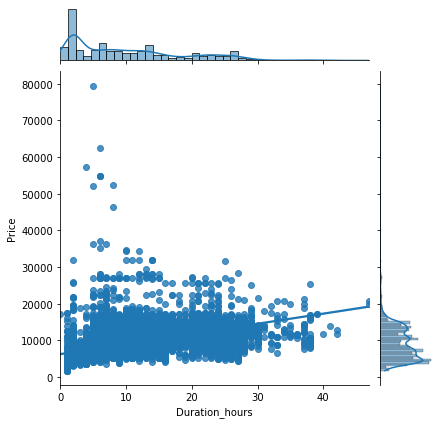

In [96]:
sns.jointplot(data=data, x='Duration_hours', y='Price', kind='reg');

I can see that as there is increase in the Duration hours the high distribution of price is within the range between 0-30 hours and as reached to maximum hours the price is low .

### Duration_mins :

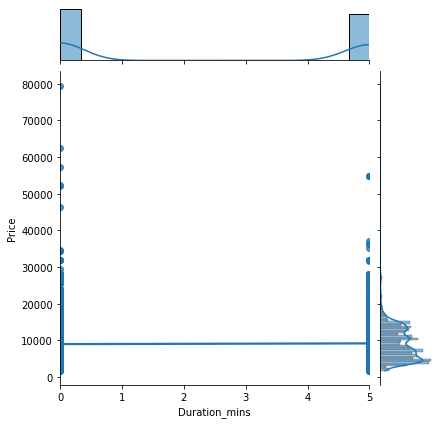

In [97]:
sns.jointplot(data=data, x='Duration_mins', y='Price', kind='reg');

I can see that as there is increase in the Duration mins the price is more or less same between the range between 1 - 4 mins and the highest price is for the 0 - mins

### Airline_Air India :

<AxesSubplot:xlabel='Airline_Air India', ylabel='Price'>

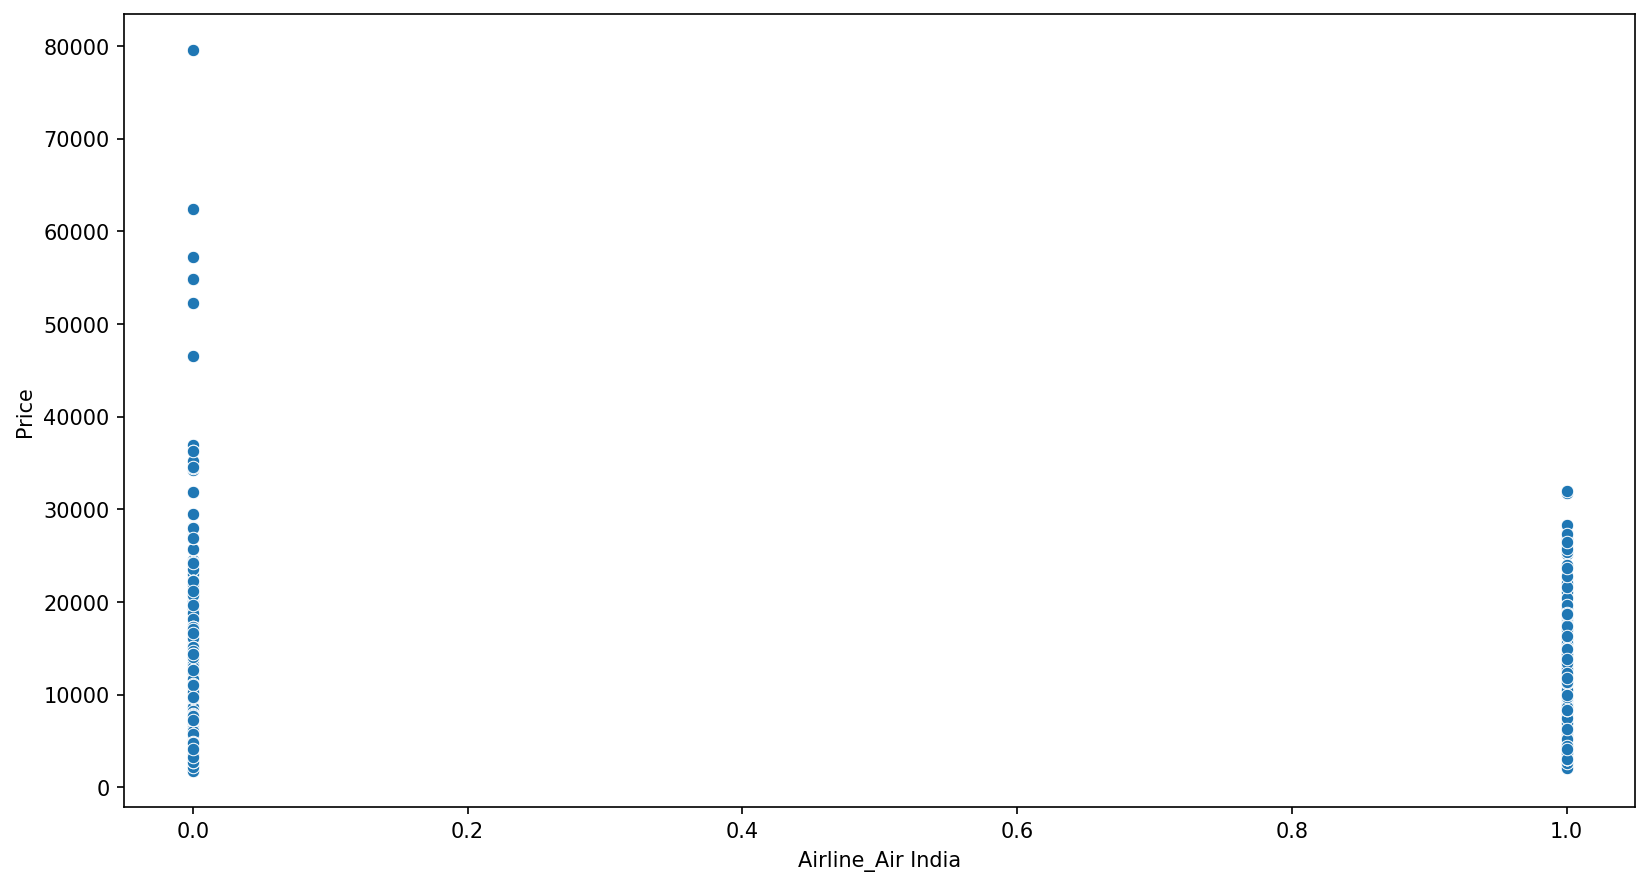

In [102]:
plt.figure(figsize = (13,7),dpi=150)
sns.scatterplot(x = 'Airline_Air India', y = 'Price',data =data,palette = 'cividcdis_r' )

I can see that the maximum price is for the value "0.0" of the "Airline_Air India".

### Airline_GoAir :

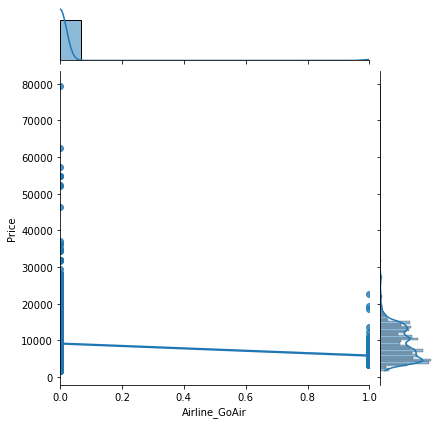

In [103]:
sns.jointplot(data=data, x='Airline_GoAir', y='Price', kind='reg');

I can see that as the values of "Airline_GoAir" is increasing there is slight decrease in the in the price when it reached to max value of attribute and the highest price is for the category "0.0" of the attribute .

### Airline_IndiGo : 

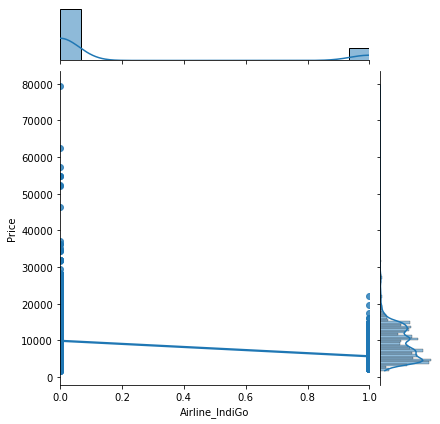

In [104]:
sns.jointplot(data=data, x='Airline_IndiGo', y='Price', kind='reg');

I can see that as the values of "Airline_IndiGo" is increasing there is slight decrease in the in the price when it reached to max value of attribute and the highest price is for the category "0.0" of the attribute .

### Airline_Jet Airways :

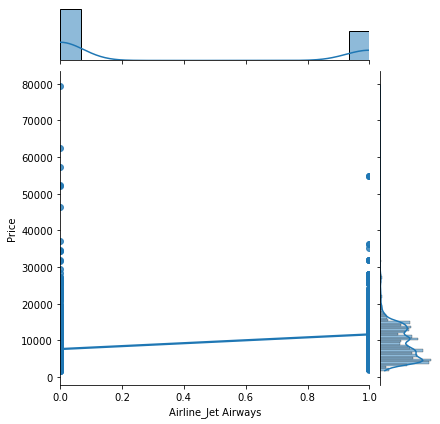

In [105]:
sns.jointplot(data=data, x='Airline_Jet Airways', y='Price', kind='reg');

I can see that as there is increase in the values of "Airline_Jet Airways" there is more or less no change in the prices in the range between 0.2 - 0.8 and the highest price is for the value 0.0 of the attribute .

### Airline_Jet Airways Business : 

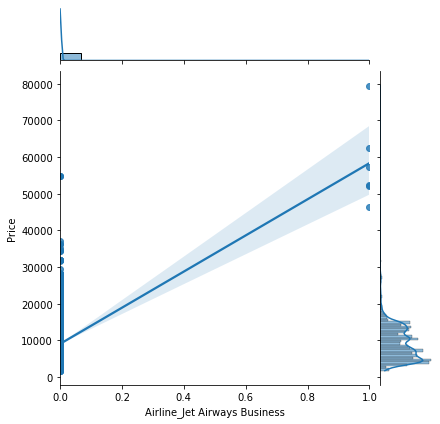

In [106]:
sns.jointplot(data=data, x='Airline_Jet Airways Business', y='Price', kind='reg');

I can see that as there is increase in the values of the attribue the price increased and is maximum at the maximum value of the attribute but the highest distribution is at 0.0 of the attribute .

### Airline_Multiple carriers :

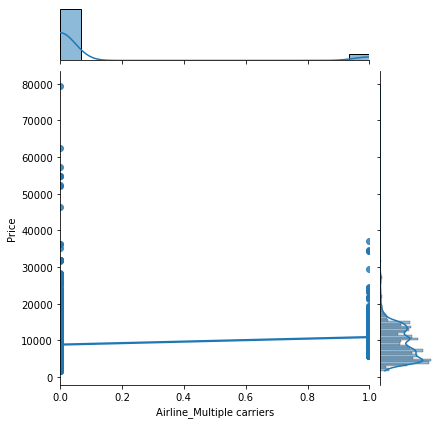

In [107]:
sns.jointplot(data=data, x='Airline_Multiple carriers', y='Price', kind='reg');

I can see that the highest distribution is for the category 0.0 of the attribute but as there is increase in the value of the attribute more or less there no changes in the attribute . 

### Airline_Multiple carriers Premium economy :

<AxesSubplot:xlabel='Airline_Multiple carriers Premium economy', ylabel='Price'>

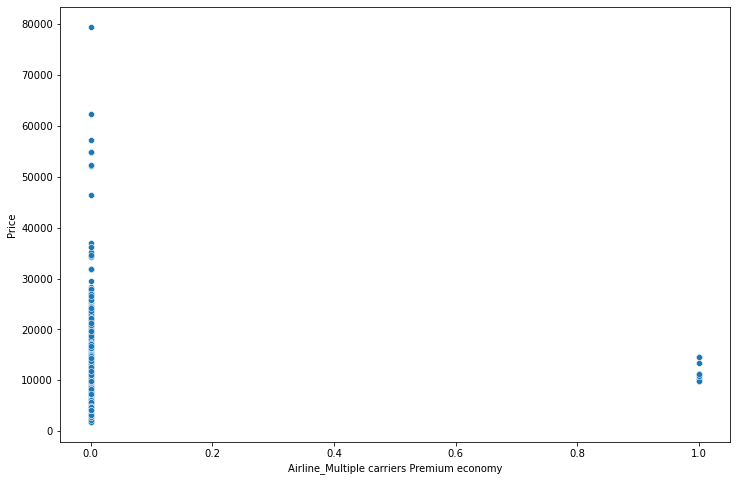

In [108]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Airline_Multiple carriers Premium economy', y = 'Price',data =data,palette = 'cividis_r' )

I can see that the high distribution is in the value 0.0 of the attribute and the maximum price is for the value 0.0 .

### Airline_SpiceJet :

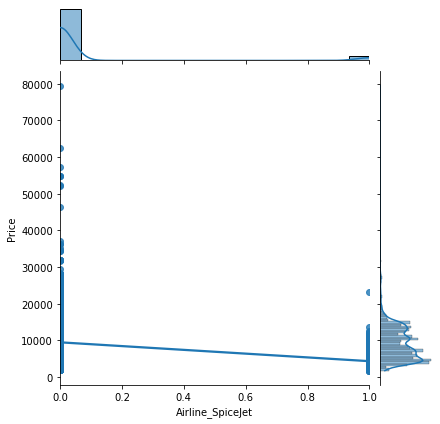

In [109]:
sns.jointplot(data=data, x='Airline_SpiceJet', y='Price', kind='reg');

I can see that as there is increase in the values of the attribute there is decrease in the prices and the highest price is for the value 0.0 and also the high distribution id for the same category .

### Airline_Trujet :

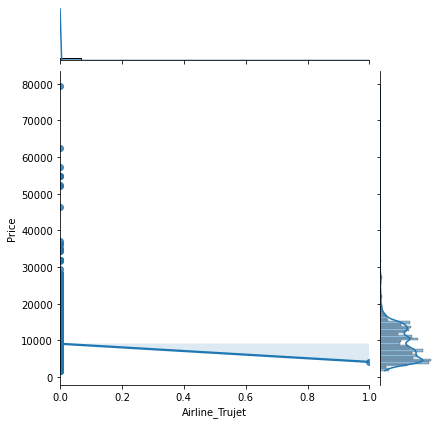

In [110]:
sns.jointplot(data=data, x='Airline_Trujet', y='Price', kind='reg');

I can see that as there is increase in the values of the attribute there is decrease in the price and the highest price and also distribution is highest for the category 0.0 of the attribute .

### Airline_Vistara :

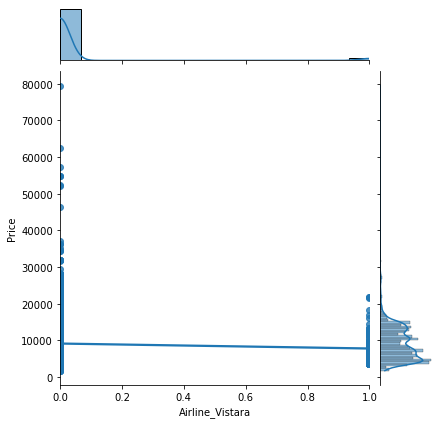

In [111]:
sns.jointplot(data=data , x='Airline_Vistara', y='Price', kind='reg');

I can see that the as the values of the attributes is increasing there is slight decrease in the price and the highest price and distribution is for the category 0.0

### Airline_Vistara Premium economy :

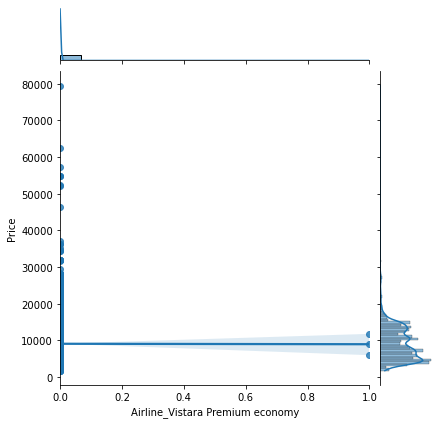

In [113]:
sns.jointplot(data=data, x='Airline_Vistara Premium economy', y='Price', kind='reg');

I can see that as the values of the attributes is increasing there is no change in the price as no distribution in the other attributes except the category 0.0 which is with highest distribition among all and the least distribution is for the max value of the attribute.

### Source_Chennai :

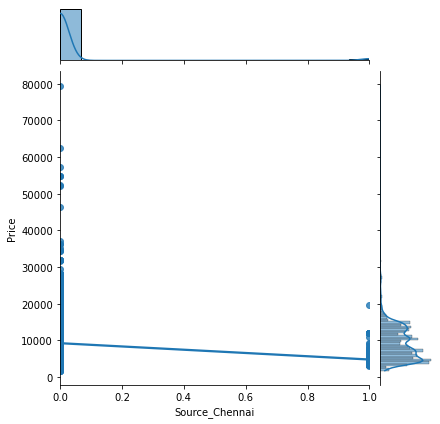

In [114]:
sns.jointplot(data=data, x='Source_Chennai', y='Price', kind='reg');

I can see that as the values of the attributes is increasing there is no change in the price as no distribution in the other attributes except the category 0.0 which is with highest distribition among all and the least distribution is for the max value of the attribute.

### Source_Delhi :

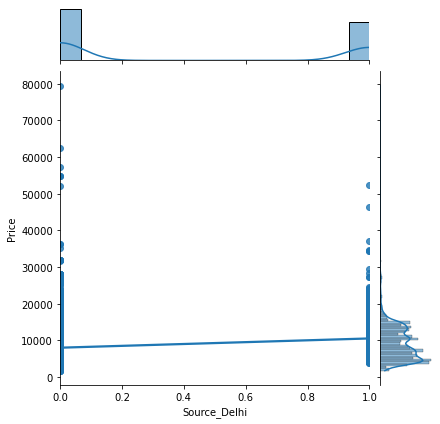

In [115]:
sns.jointplot(data=data, x='Source_Delhi', y='Price', kind='reg');

I can see that as the value of the attribute are increasing there is more or less no change in the price but the distribution is high for the category 0.0 and followed by 1.0

### Source_Kolkata :

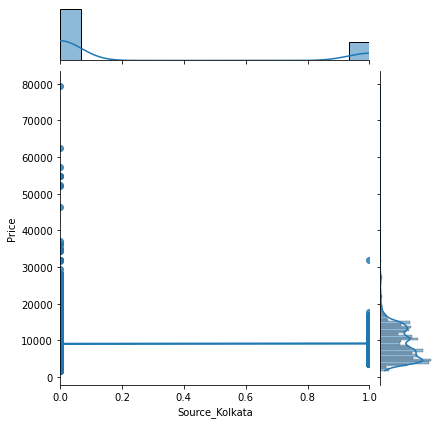

In [116]:
sns.jointplot(data=data, x='Source_Kolkata', y='Price', kind='reg');

I can see that as the value of the attribute are increasing there is more or less no change in the price but the distribution is high for the category 0.0 and followed by 1.0

### Source_Mumbai :

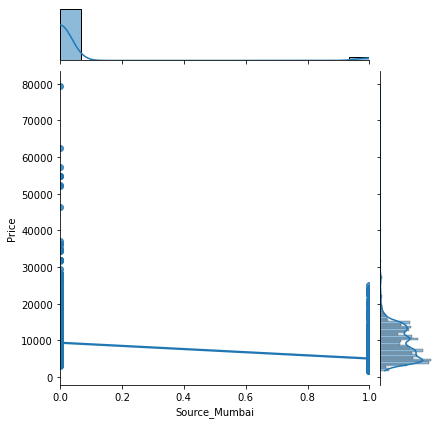

In [118]:
sns.jointplot(data=data, x='Source_Mumbai', y='Price', kind='reg');

I can see that as the value of the attribute are increasing there is slight decrease in the price but the distribution is high for the category 0.0 and followed by 1.0

### Destination_Cochin :

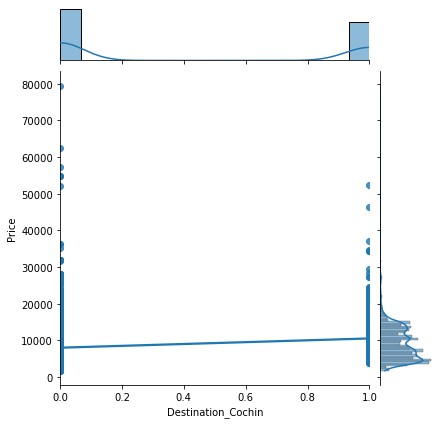

In [119]:
sns.jointplot(data=data, x='Destination_Cochin', y='Price', kind='reg');

I can see that as the values of the attribute is increasing there is slight change in the price but the highest price is for the category 0.0 of the attribute

### Destination_Delhi :

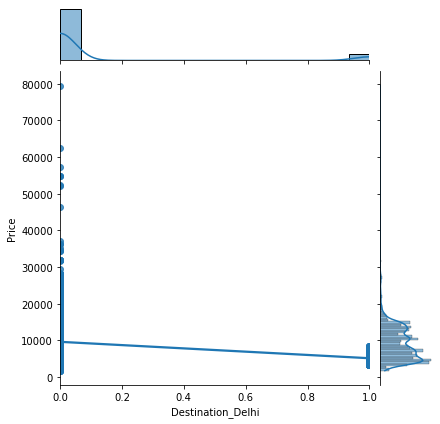

In [121]:
sns.jointplot(data=data, x='Destination_Delhi', y='Price', kind='reg');

I can see that the highest distribution is for the category 0.0 of the attribute and as the values of the attribute are increasing there is slight decrease in the price and least distribution is for the maximum value of the attribute.

### Destination_Hyderabad :

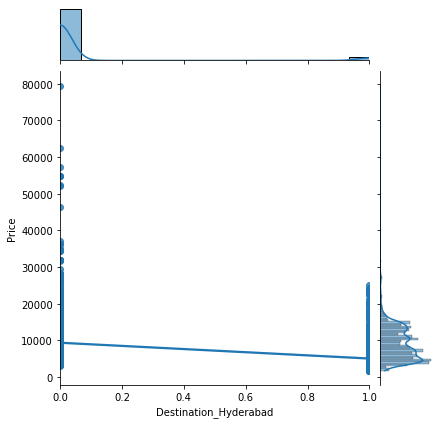

In [122]:
sns.jointplot(data=data, x='Destination_Hyderabad', y='Price', kind='reg');

I can see that the highest distribution is for the category 0.0 of the attribute and as the values of the attribute are increasing there is slight decrease in the price and least distribution is for the maximum value of the attribute.

### Destination_Kolkata :

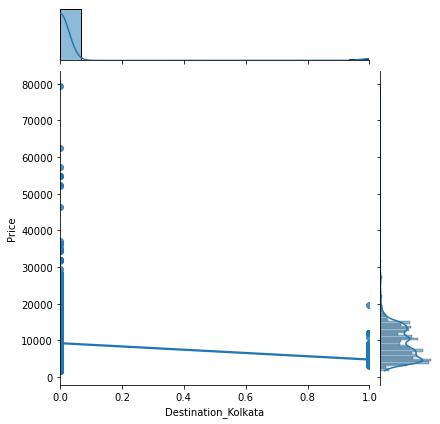

In [123]:
sns.jointplot(data=data, x='Destination_Kolkata', y='Price', kind='reg');

I can see that the highest distribution is for the category 0.0 of the attribute and as the values of the attribute are increasing there is slight decrease in the price and least distribution is for the maximum value of the attribute.

### Destination_New Delhi :

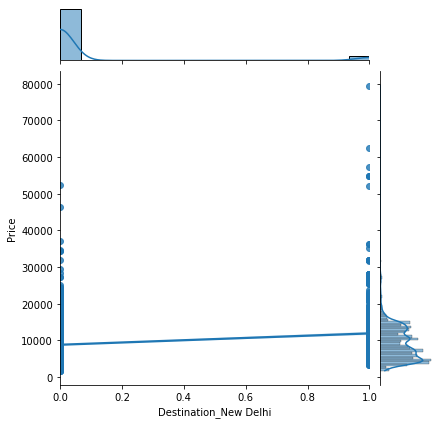

In [124]:
sns.jointplot(data=data, x='Destination_New Delhi', y='Price', kind='reg');

I can see that as the values of the attribute is increasing there is increase in the price and the distribution is also high for the value 1.0 of the attribute and followed by 0.0

### Correlation :

<AxesSubplot:>

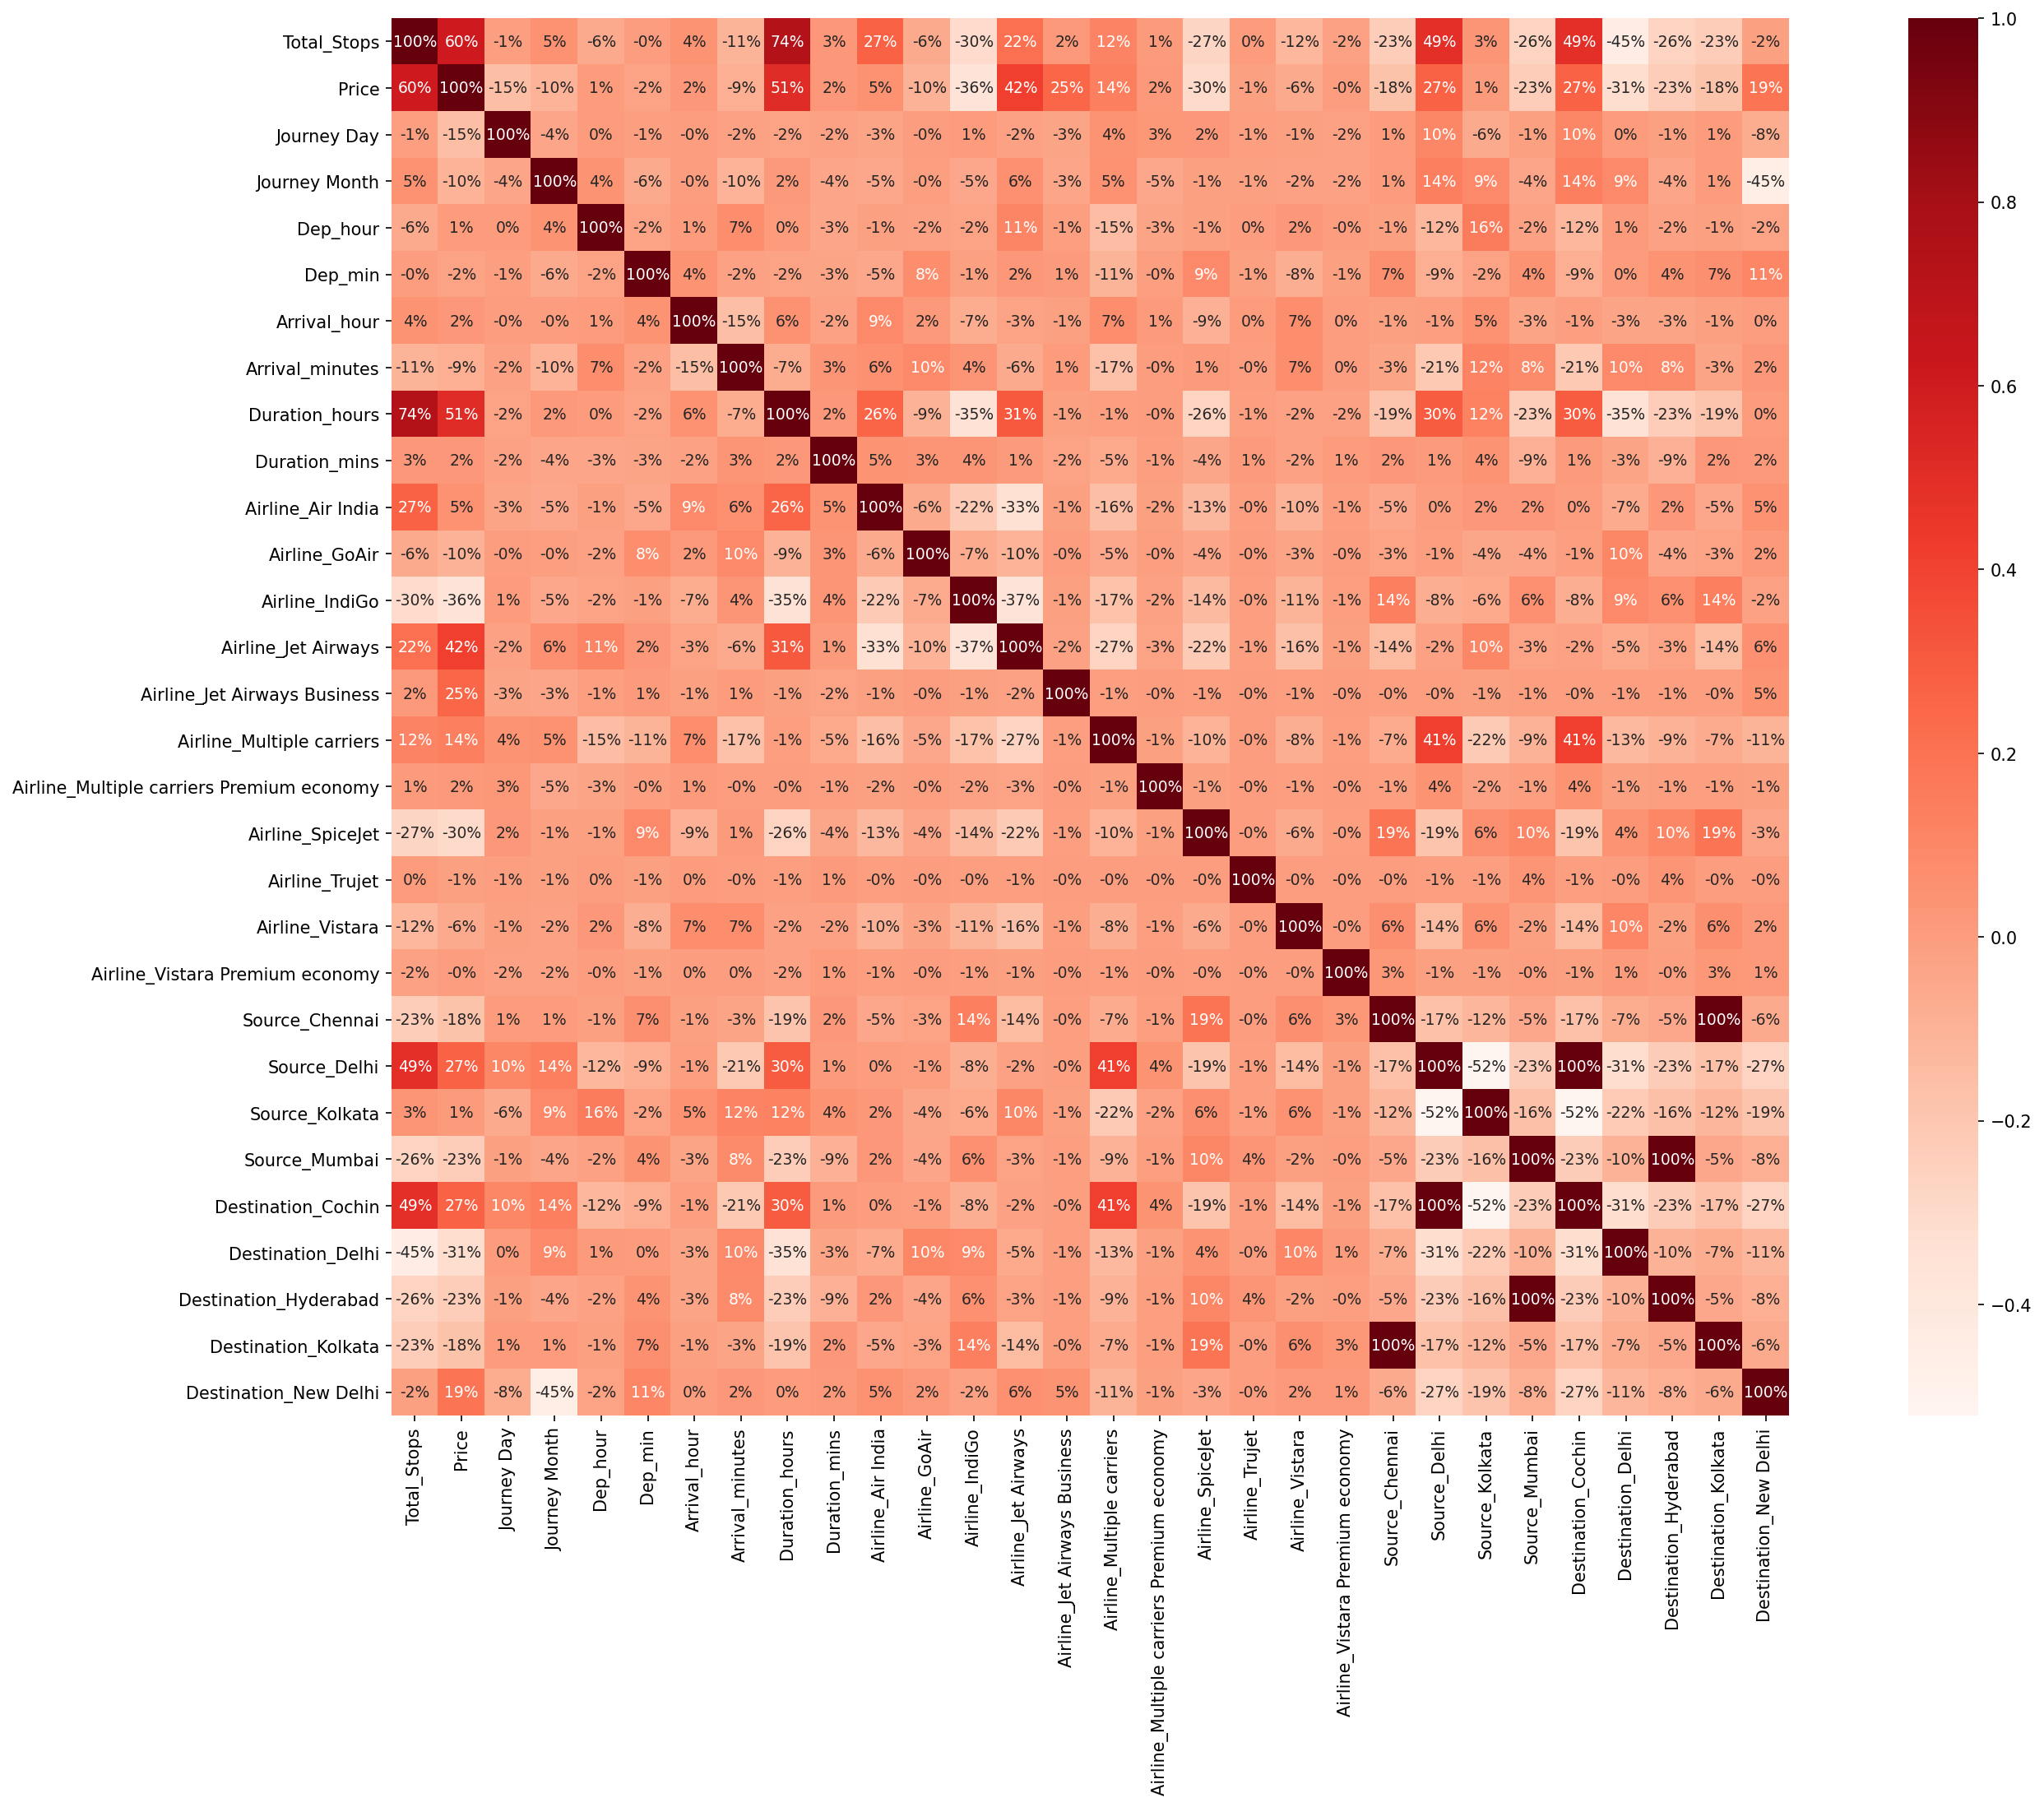

In [126]:
plt.figure(figsize = (25,15),dpi=150)
sns.heatmap(data.corr(),cbar = True, square = True, fmt = ".0%", annot = True, annot_kws = {'size': 9}, cmap = 'Reds')

i. I can see that highest correlation is between the variables "Source_chennai" and "Destination_Kolkatta","Source_Delhi" and "Destination_Cochin" , "Source_Mumbai" and "Destination_Hyderabad" .

ii. I can see that next highest correlation is for the variables "Duration_Hours" and "Total_stops" .

### Checking for the outliers :

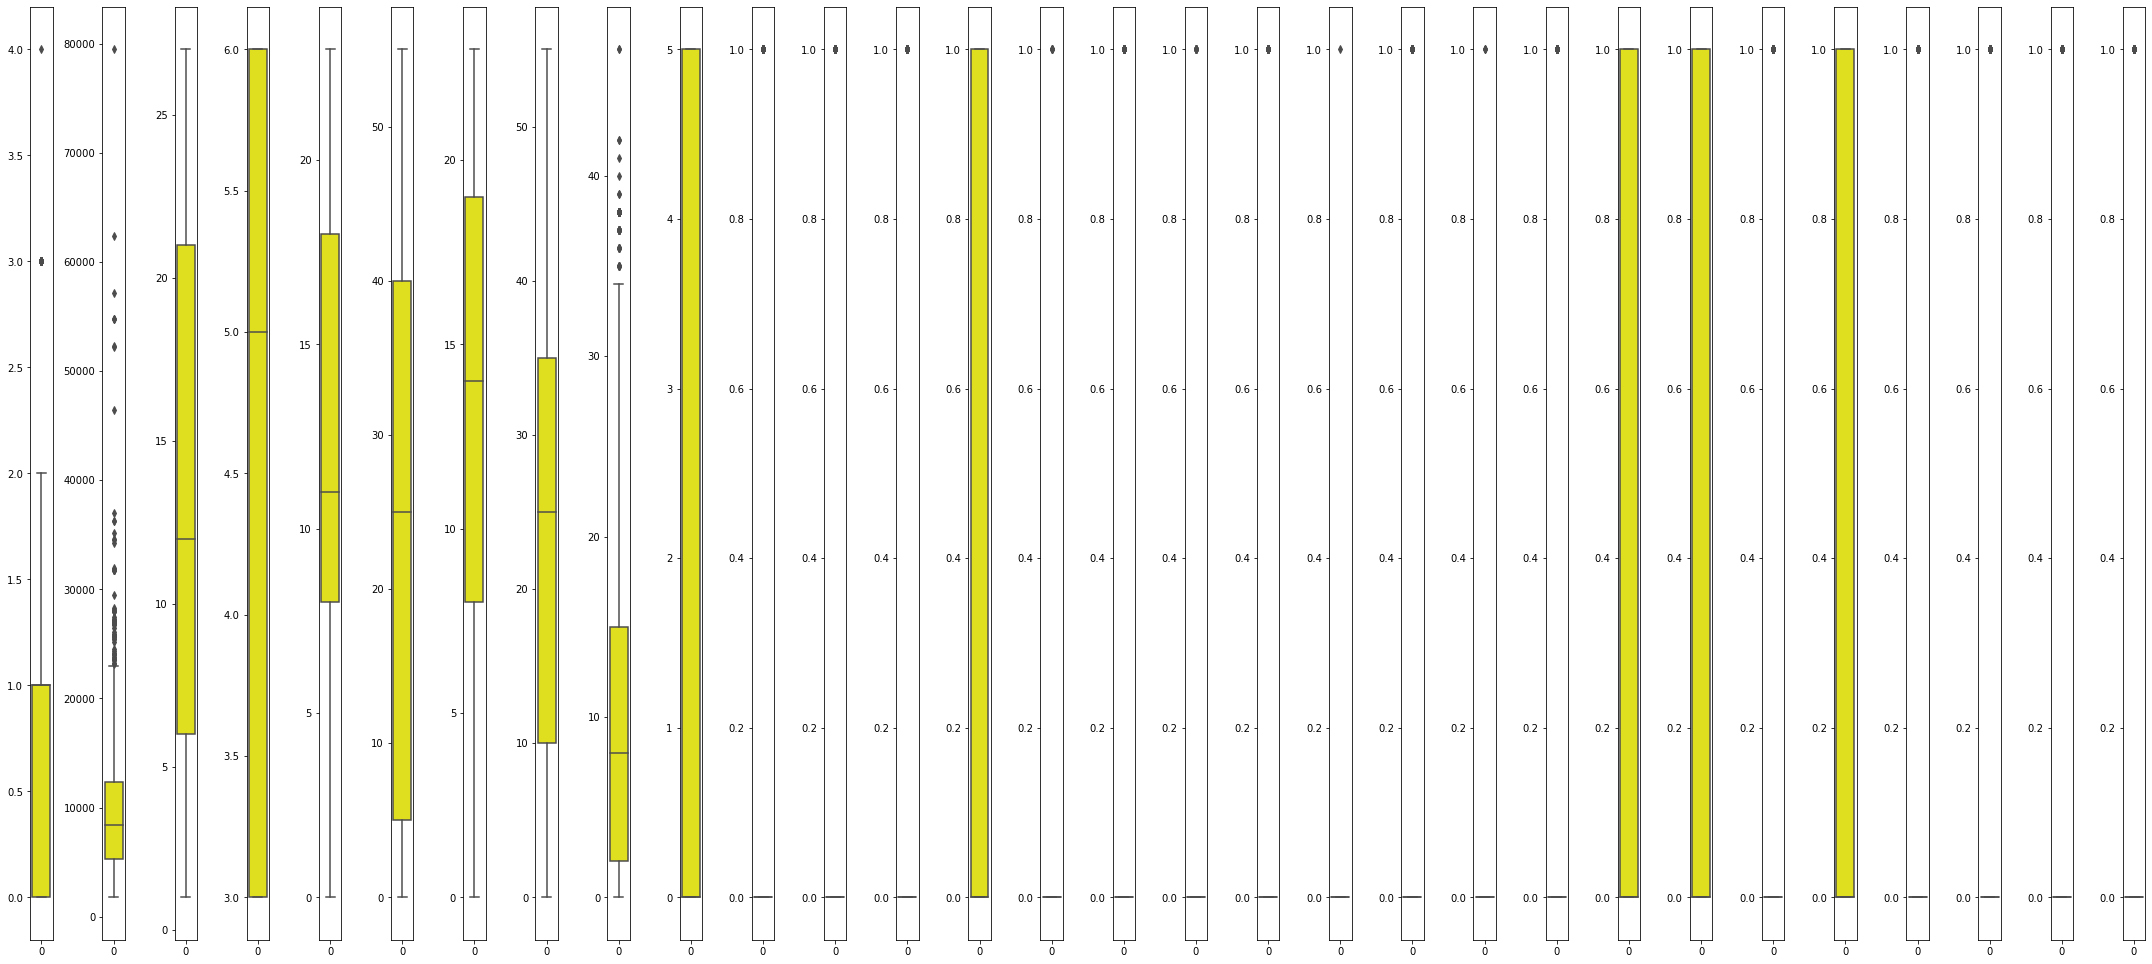

In [127]:
col_list = data.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[col_list[i]],color = 'yellow', orient = 'v')
    plt.tight_layout()

I can see that few of the columns have outliers and I have to treat them for our good accuracy.

### Removing the outliers through Z - Score Method :

In [129]:
from scipy.stats import zscore
z = np.abs(zscore(data))
z.shape

(10682, 30)

In [130]:
threshold = 4
print(np.where(z>4))

(array([   12,    12,    20, ..., 10658, 10659, 10680], dtype=int64), array([21, 28, 11, ..., 19, 19, 19], dtype=int64))


In [131]:
data_new = data[(z<4).all(axis = 1)]
print(data.shape)
print(data_new.shape)

(10682, 30)
(9616, 30)


### Loss percentage calculation :

In [132]:
loss_percent = (10682-9616)/10682*100
print(loss_percent)

9.979404605879049


I can see that there is total around 9% of data loss, but the outliers have also been treated, So I can go for the model building.

### Skewness :

In [133]:
data_new.skew()

Total_Stops                                  0.243486
Price                                        0.582502
Journey Day                                  0.118144
Journey Month                               -0.407719
Dep_hour                                     0.096521
Dep_min                                      0.193263
Arrival_hour                                -0.356858
Arrival_minutes                              0.139069
Duration_hours                               0.781017
Duration_mins                                0.106657
Airline_Air India                            1.674282
Airline_GoAir                                0.000000
Airline_IndiGo                               1.544991
Airline_Jet Airways                          0.417791
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    2.284049
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             3.319182
Airline_Trujet              

In [134]:
features = ["Destination_New Delhi","Destination_Hyderabad","Destination_Delhi","Source_Mumbai","Airline_SpiceJet","Airline_Multiple carriers","Airline_IndiGo","Airline_Air India","Source_Kolkata","Duration_hours"]

In [135]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [136]:
data_new[features] = scaler.fit_transform(data_new[features].values)
data_new[features]

Destination_New Delhi  Destination_Hyderabad  Destination_Delhi  \
0                   3.264316              -0.274325          -0.352726   
1                  -0.306343              -0.274325          -0.352726   
2                  -0.306343              -0.274325          -0.352726   
3                  -0.306343              -0.274325          -0.352726   
4                   3.264316              -0.274325          -0.352726   
...                      ...                    ...                ...   
10677              -0.306343              -0.274325           2.835065   
10678              -0.306343              -0.274325          -0.352726   
10679              -0.306343              -0.274325          -0.352726   
10680              -0.306343              -0.274325           2.835065   
10682              -0.306343              -0.274325          -0.352726   

       Source_Mumbai  Airline_SpiceJet  Airline_Multiple carriers  \
0          -0.274325         -0.278033                  -0.375985   
1          -0.274325         -0.278033                  -0.375985   
2          -0.274325         -0.278033                  -0.375985   
3          -0.274325         -0.278033                  -0.375985   
4          -0.274325         -0.278033                  -0.375985   
...              ...               ...                        ...   
10677      -0.274325          3.596697                  -0.375985   
10678      -0.274325         -0.278033                  -0.375985   
10679      -0.274325         -0.278033                  -0.375985   
10680      -0.274325         -0.278033                  -0.375985   
10682      -0.274325         -0.278033                  -0.375985   

       Airline_IndiGo  Airline_Air India  Source_Kolkata  Duration_hours  
0            2.035927          -0.467055       -0.618709       -1.235761  
1           -0.491177           2.141076        1.616268       -0.155963  
2           -0.491177          -0.467055       -0.618709        1.029313  
3            2.035927          -0.467055        1.616268       -0.491557  
4            2.035927          -0.467055       -0.618709       -0.695894  
...               ...                ...             ...             ...  
10677       -0.491177          -0.467055       -0.618709       -1.235761  
10678       -0.491177          -0.467055        1.616268       -1.235761  
10679       -0.491177           2.141076        1.616268       -1.235761  
10680       -0.491177          -0.467055       -0.618709       -0.937506  
10682       -0.491177           2.141076       -0.618709       -0.013753  

[9616 rows x 10 columns]

In [137]:
data_new.skew()

Total_Stops                                  0.243486
Price                                        0.582502
Journey Day                                  0.118144
Journey Month                               -0.407719
Dep_hour                                     0.096521
Dep_min                                      0.193263
Arrival_hour                                -0.356858
Arrival_minutes                              0.139069
Duration_hours                              -0.058103
Duration_mins                                0.106657
Airline_Air India                            1.674282
Airline_GoAir                                0.000000
Airline_IndiGo                               1.544991
Airline_Jet Airways                          0.417791
Airline_Jet Airways Business                 0.000000
Airline_Multiple carriers                    2.284049
Airline_Multiple carriers Premium economy    0.000000
Airline_SpiceJet                             3.319182
Airline_Trujet              

I can see that skewness is here, hardly any skewness is removed .

## Test data :

In [211]:
test_data = pd.read_excel('Test_set.xlsx')
test_data

Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL → BOM → COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU → MAA → BLR    06:20         10:20       4h      1 stop   
2     DEL → BOM → COK    19:15  19:00 22 May  23h 45m      1 stop   
3     DEL → BOM → COK    08:00         21:00      13h      1 stop   
4           BLR → DEL    23:55  02:45 25 Jun   2h 50m    non-stop   
...               ...      ...           ...      ...         ...   
2666  CCU → DEL → BLR    20:30  20:25 07 Jun  23h 55m      1 stop   
2667        CCU → BLR    14:20         16:55   2h 35m    non-stop   
2668  DEL → BOM → COK    21:50  04:25 07 Mar   6h 35m      1 stop   
2669  DEL → BOM → COK    04:00         19:15  15h 15m      1 stop   
2670  DEL → BOM → COK    04:55         19:15  14h 20m      1 stop   

                  Additional_Info  
0                         No info  
1                         No info  
2     In-flight meal not included  
3                         No info  
4                         No info  
...                           ...  
2666                      No info  
2667                      No info  
2668                      No info  
2669                      No info  
2670                      No info  

[2671 rows x 10 columns]

### Pre-processing :

In [212]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [213]:
test_data.dropna(inplace = True)
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

## EDA

### Date of Journey :

In [214]:
test_data["Journey Day"] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.day
test_data["Journey Month"] = pd.to_datetime(test_data.Date_of_Journey,format = "%d/%m/%Y").dt.day
test_data.drop(["Date_of_Journey"],axis = 1,inplace = True)

### Dep_Time :

In [215]:
test_data["Dep_hour"] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(["Dep_Time"],axis = 1,inplace = True)

### Arrival_Time :

In [216]:
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"],axis = 1,inplace = True)

### Duration :

In [217]:
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i] :
            duration[i] = duration[i].strip() + "0m"
        else:
            duration[i] = "0h" + duration[i]
            
duration_hours = []
duration_mins = []

for i in range(len(duration)) :
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].strip()[-1]))

In [218]:
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

In [219]:
test_data.drop(["Duration"],axis = 1,inplace = True)

In [220]:
test_data.head()

Airline    Source Destination            Route Total_Stops  \
0        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
1             IndiGo   Kolkata    Banglore  CCU → MAA → BLR      1 stop   
2        Jet Airways     Delhi      Cochin  DEL → BOM → COK      1 stop   
3  Multiple carriers     Delhi      Cochin  DEL → BOM → COK      1 stop   
4           Air Asia  Banglore       Delhi        BLR → DEL    non-stop   

               Additional_Info  Journey Day  Journey Month  Dep_hour  Dep_min  \
0                      No info            6              6        17       30   
1                      No info           12             12         6       20   
2  In-flight meal not included           21             21        19       15   
3                      No info           21             21         8        0   
4                      No info           24             24        23       55   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             4           25              10              5  
1            10           20               4              0  
2            19            0              23              5  
3            21            0              13              0  
4             2           45               2              0

In [221]:
test_data["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [222]:
Airline = pd.get_dummies(test_data["Airline"],drop_first = True)

In [223]:
Airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       0            1                     0   
1          0      0       1            0                     0   
2          0      0       0            1                     0   
3          0      0       0            0                     0   
4          0      0       0            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Vistara  \
0                  0                                  0         0        0   
1                  0                                  0         0        0   
2                  0                                  0         0        0   
3                  1                                  0         0        0   
4                  0                                  0         0        0   

   Vistara Premium economy  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [224]:
test_data["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [225]:
Source = test_data[["Source"]]
Source = pd.get_dummies(Source , drop_first = True)
Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             1               0              0
1               0             0               1              0
2               0             1               0              0
3               0             1               0              0
4               0             0               0              0

In [226]:
test_data["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [227]:
Destination = test_data[["Destination"]]
Destination = pd.get_dummies(Destination , drop_first = True)
Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   1                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   1                  0                      0   
4                   0                  1                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      0  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      0

In [228]:
test_data["Route"]

0       DEL → BOM → COK
1       CCU → MAA → BLR
2       DEL → BOM → COK
3       DEL → BOM → COK
4             BLR → DEL
             ...       
2666    CCU → DEL → BLR
2667          CCU → BLR
2668    DEL → BOM → COK
2669    DEL → BOM → COK
2670    DEL → BOM → COK
Name: Route, Length: 2671, dtype: object

In [229]:
test_data["Total_Stops"]

0         1 stop
1         1 stop
2         1 stop
3         1 stop
4       non-stop
          ...   
2666      1 stop
2667    non-stop
2668      1 stop
2669      1 stop
2670      1 stop
Name: Total_Stops, Length: 2671, dtype: object

In [230]:
test_data["Additional_Info"]

0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2671, dtype: object

In [231]:
test_data.drop(["Route" , "Additional_Info"] , axis = 1 , inplace = True)

In [232]:
test_data["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [233]:
test_data.replace({"non-stop" : 0 , "1 stop" : 1 , "2 stops" : 2 , "3 stops" : 3 , "4 stops" : 4} , inplace = True)

In [234]:
data_test= pd.concat([test_data, Airline ,Source , Destination] , axis = 1) 

In [235]:
data_test.head()

Airline    Source Destination  Total_Stops  Journey Day  \
0        Jet Airways     Delhi      Cochin            1            6   
1             IndiGo   Kolkata    Banglore            1           12   
2        Jet Airways     Delhi      Cochin            1           21   
3  Multiple carriers     Delhi      Cochin            1           21   
4           Air Asia  Banglore       Delhi            0           24   

   Journey Month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              6        17       30             4           25   
1             12         6       20            10           20   
2             21        19       15            19            0   
3             21         8        0            21            0   
4             24        23       55             2           45   

   Duration_hours  Duration_mins  Air India  GoAir  IndiGo  Jet Airways  \
0              10              5          0      0       0            1   
1               4              0          0      0       1            0   
2              23              5          0      0       0            1   
3              13              0          0      0       0            0   
4               2              0          0      0       0            0   

   Jet Airways Business  Multiple carriers  Multiple carriers Premium economy  \
0                     0                  0                                  0   
1                     0                  0                                  0   
2                     0                  0                                  0   
3                     0                  1                                  0   
4                     0                  0                                  0   

   SpiceJet  Vistara  Vistara Premium economy  Source_Chennai  Source_Delhi  \
0         0        0                        0               0             1   
1         0        0                        0               0             0   
2         0        0                        0               0             1   
3         0        0                        0               0             1   
4         0        0                        0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   1                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               0              0                   1                  0   
4               0              0                   0                  1   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      0  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      0

In [236]:
data_test.drop(["Airline" , "Source" , "Destination"], axis = 1 , inplace = True)

In [237]:
data_test.head()

Total_Stops  Journey Day  Journey Month  Dep_hour  Dep_min  Arrival_hour  \
0            1            6              6        17       30             4   
1            1           12             12         6       20            10   
2            1           21             21        19       15            19   
3            1           21             21         8        0            21   
4            0           24             24        23       55             2   

   Arrival_min  Duration_hours  Duration_mins  Air India  GoAir  IndiGo  \
0           25              10              5          0      0       0   
1           20               4              0          0      0       1   
2            0              23              5          0      0       0   
3            0              13              0          0      0       0   
4           45               2              0          0      0       0   

   Jet Airways  Jet Airways Business  Multiple carriers  \
0            1                     0                  0   
1            0                     0                  0   
2            1                     0                  0   
3            0                     0                  1   
4            0                     0                  0   

   Multiple carriers Premium economy  SpiceJet  Vistara  \
0                                  0         0        0   
1                                  0         0        0   
2                                  0         0        0   
3                                  0         0        0   
4                                  0         0        0   

   Vistara Premium economy  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                        0               0             1               0   
1                        0               0             0               1   
2                        0               0             1               0   
3                        0               0             1               0   
4                        0               0             0               0   

   Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0              0                   1                  0   
1              0                   0                  0   
2              0                   1                  0   
3              0                   1                  0   
4              0                   0                  1   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      0  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      0

In [238]:
data_test.shape

(2671, 28)

In [239]:
data_test.columns

Index(['Total_Stops', 'Journey Day', 'Journey Month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

### Checking the outliers :

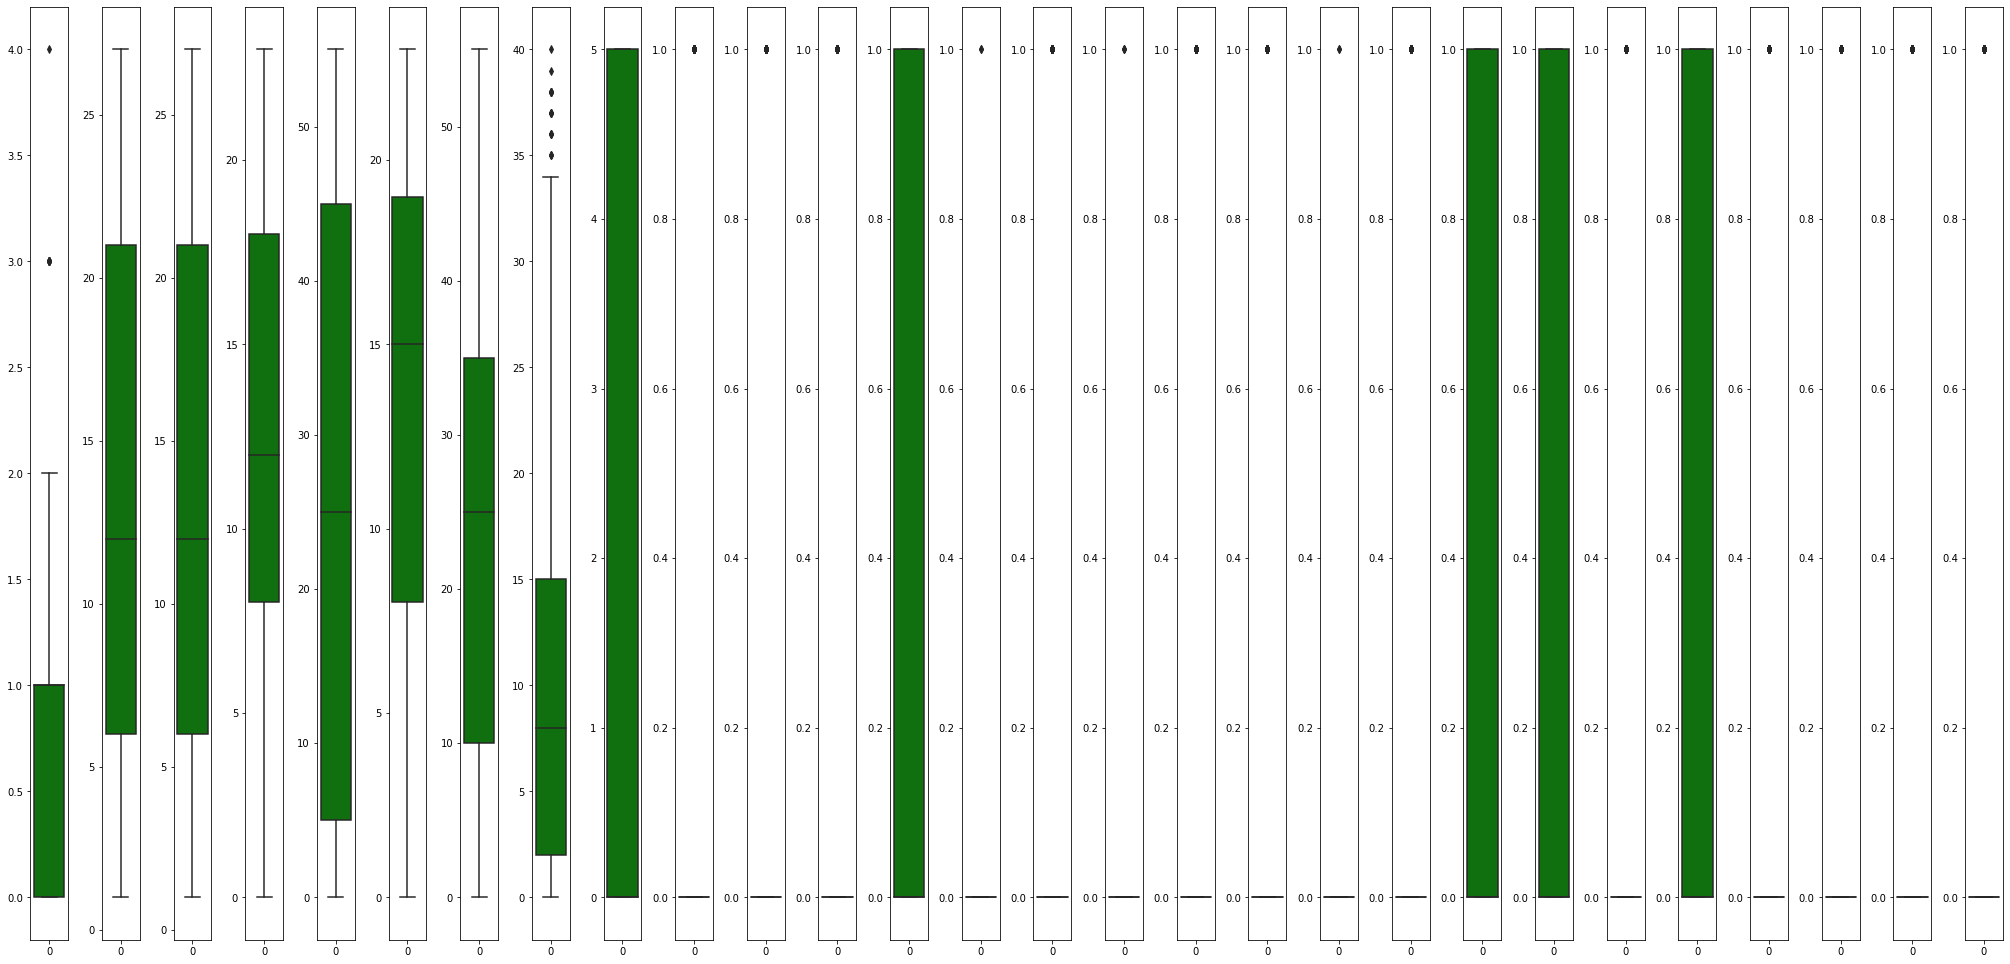

In [240]:
col_list = data_test.columns.values
ncol = 32
nrows = 12
plt.figure(figsize = (ncol,5*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data_test[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

### Removing the outliers through Z - Score Method :

In [244]:
from scipy.stats import zscore
z = np.abs(zscore(data_test))
z.shape

(2671, 28)

In [245]:
threshold = 4
print(np.where(z>4))

(array([  17,   45,   45,   54,   54,   59,   64,   78,   81,   82,   86,
         86,  127,  138,  163,  169,  169,  185,  191,  195,  195,  203,
        203,  209,  223,  223,  247,  272,  274,  279,  283,  293,  295,
        301,  302,  302,  325,  325,  327,  340,  351,  363,  364,  384,
        393,  396,  415,  433,  433,  443,  443,  453,  470,  472,  472,
        494,  494,  495,  495,  504,  504,  534,  541,  541,  580,  589,
        599,  600,  603,  604,  604,  604,  626,  646,  646,  647,  650,
        665,  667,  667,  669,  697,  708,  730,  731,  732,  732,  733,
        733,  739,  739,  764,  764,  767,  773,  779,  783,  792,  795,
        795,  802,  807,  807,  813,  846,  846,  849,  855,  866,  866,
        868,  874,  874,  876,  881,  889,  906,  906,  918,  918,  919,
        932,  932,  942,  942,  957,  964,  970,  985,  993,  993,  995,
        998, 1003, 1018, 1030, 1030, 1044, 1054, 1060, 1065, 1102, 1129,
       1129, 1142, 1159, 1169, 1169, 1177, 1177, 1

In [246]:
data_test_new = data_test[(z<4).all(axis = 1)]
print(data_test.shape)
print(data_test_new.shape)

(2671, 28)
(2419, 28)


### Loss Percentage Calculation:

In [247]:
loss_percent = (2671-2397)/2671*100
print(loss_percent)

10.25833021340322


I can see that there is 10% loss .

### Separating the independent and dependent variables :

#### Train_test_split :

In [249]:
x = data_new.drop("Price", axis=1)
y = data_new["Price"]

In [250]:
x.head()

Total_Stops  Journey Day  Journey Month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_minutes  Duration_hours  Duration_mins  Airline_Air India  \
0               10       -1.235761              0          -0.467055   
1               15       -0.155963              5           2.141076   
2               25        1.029313              0          -0.467055   
3               30       -0.491557              5          -0.467055   
4               35       -0.695894              5          -0.467055   

   Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0              0        2.035927                    0   
1              0       -0.491177                    0   
2              0       -0.491177                    1   
3              0        2.035927                    0   
4              0        2.035927                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                  -0.375985   
1                             0                  -0.375985   
2                             0                  -0.375985   
3                             0                  -0.375985   
4                             0                  -0.375985   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0         -0.278033   
1                                          0         -0.278033   
2                                          0         -0.278033   
3                                          0         -0.278033   
4                                          0         -0.278033   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0       -0.618709      -0.274325   
1               0             0        1.616268      -0.274325   
2               0             1       -0.618709      -0.274325   
3               0             0        1.616268      -0.274325   
4               0             0       -0.618709      -0.274325   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0          -0.352726              -0.274325   
1                   0          -0.352726              -0.274325   
2                   1          -0.352726              -0.274325   
3                   0          -0.352726              -0.274325   
4                   0          -0.352726              -0.274325   

   Destination_Kolkata  Destination_New Delhi  
0                    0               3.264316  
1                    0              -0.306343  
2                    0              -0.306343  
3                    0              -0.306343  
4                    0               3.264316

In [251]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [253]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.6353458139168587  on Random_state  86


In [254]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Regression Algorithms :

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Linear Regression :

In [256]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',metrics.r2_score(y_test,predLR))

R2_score: 0.6353458139168587


In [257]:
print(metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predLR)))

1878.552456847212
6279795.104179276
2505.951935728073


### Random Forest Regressor :

In [258]:
#Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predRFR))

R2_Score: 0.824903815835752


In [259]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predRFR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predRFR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

1156.540716951006
3015372.3775555827
1736.4827605120595


### KNN Regressor :

In [260]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predknn))

R2_Score: 0.6052587466263497


In [261]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predknn)))

1844.3443327556326
6797931.53337955
2607.2843215459934


### GradientBoostingRegressor :

In [262]:
gbdt=GradientBoostingRegressor(random_state=0)
gbdt.fit(x_train,y_train)

#prediction
predgbdt=gbdt.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predgbdt))

R2_Score: 0.7738610168507883


In [263]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predgbdt))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predgbdt))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predgbdt)))

1493.1400290965912
3894392.3680083975
1973.4214876727165


### AdaBoostRegressor :

In [264]:
ada=AdaBoostRegressor(random_state=0)
ada.fit(x_train,y_train)

#prediction
predada=ada.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predada))

R2_Score: 0.6287698552256631


In [265]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_test, predada))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_test, predada))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, predada)))

2058.2518218850537
6393041.2282340275
2528.446406043448


### Checking the Cross_validation Score :

In [266]:
from sklearn.model_selection import cross_val_score

In [267]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,x,y,cv=5,n_jobs=-1).mean())

0.6148936758164669


In [268]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,x,y,cv=5,n_jobs=-1).mean())

0.8144197747558378


In [269]:
# Checking cv score for Gradient Boost Regression
print(cross_val_score(gbdt,x,y,cv=5,n_jobs=-1).mean())

0.7754982342695679


In [270]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,x,y,cv=5,n_jobs=-1).mean())

0.6172711160082242


In [271]:
# Checking cv score for Ada Boost Regressor
print(cross_val_score(ada,x,y,cv=5,n_jobs=-1).mean())

0.6345167026647862


### Regularization :

In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [273]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

In [274]:
grid=GridSearchCV(RFR,parameters,scoring='r2',cv=10,n_jobs=-1)

In [275]:
grid_result = grid.fit(x_train,y_train)

In [277]:
grid_result.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 20}

In [278]:
grid_result.score(x_train,y_train)

0.7729712916773497

In [279]:
y_preds_RFR=grid_result.predict(x_test)
rmse_RFR=np.sqrt(mean_squared_error(y_preds_RFR,y_test))
print('RMSE for RandomFOrest Regression :{0:.2f}'.format(rmse_RFR))

RMSE for RandomFOrest Regression :2032.68


In [280]:
RandomForest = RandomForestRegressor(criterion = 'mse', max_features = 'auto', max_depth = 6 , n_estimators = 20 )
RandomForest.fit(x_train,y_train)
RandomForest.score(x_train,y_train)

pred_decision = RandomForest.predict(x_test)
RandomForestS = r2_score(y_test,pred_decision)
print('R2 Score:', RandomForestS*100)

RandomForestScore = cross_val_score(RandomForest,x,y,cv = 5)
RandomForestC = RandomForestScore.mean()
print("Cross Val Score:",RandomForestC*100)

R2 Score: 75.99589991542831
Cross Val Score: 76.04441824157749


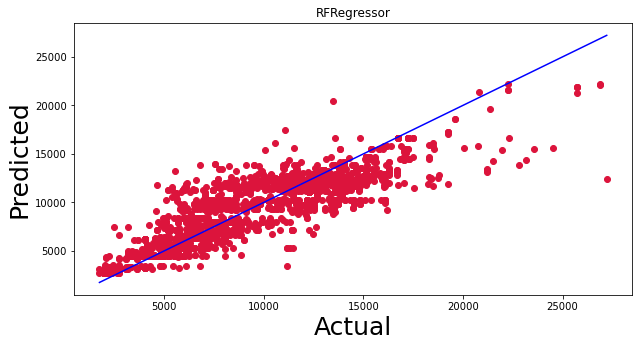

In [282]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, pred_decision, c='crimson')
p1 = max(max(pred_decision), max(y_test))
p2 = min(min(pred_decision), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=25)
plt.ylabel('Predicted', fontsize=25)
plt.title("RFRegressor")
plt.show()

### Saving the model :

In [283]:
import pickle
filename = 'churn.pkl'
pickle.dump(RandomForest,open(filename, 'wb'))

In [284]:
loaded_model = pickle.load(open("churn.pkl", "rb"))
result = loaded_model.score(x_test, y_test)
print(result)

0.7599589991542831


In [285]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index = ["Predicted","Original"])
conclusion

0            1             2            3             4     \
Predicted  4488.911091  4433.827379  12854.432561  6674.573365  12679.151157   
Original   4488.911091  4433.827379  12854.432561  6674.573365  12679.151157   

                  5            6           7            8            9     \
Predicted  4570.641404  4433.827379  5590.86963  8423.242126  4494.241412   
Original   4570.641404  4433.827379  5590.86963  8423.242126  4494.241412   

                  10           11            12           13           14    \
Predicted  3209.990236  12563.28451  10238.674635  6674.573365  6382.065224   
Original   3209.990236  12563.28451  10238.674635  6674.573365  6382.065224   

                  15            16            17           18            19    \
Predicted  5322.463408  12013.714453  11601.126129  5322.463408  11716.623516   
Original   5322.463408  12013.714453  11601.126129  5322.463408  11716.623516   

                  20            21           22            23            24    \
Predicted  5655.333731  12371.186407  9913.357105  13894.487091  11845.353183   
Original   5655.333731  12371.186407  9913.357105  13894.487091  11845.353183   

                   25           26           27           28            29    \
Predicted  10238.674635  5728.671702  12563.28451  5341.132806  12001.767623   
Original   10238.674635  5728.671702  12563.28451  5341.132806  12001.767623   

                  30            31           32            33            34    \
Predicted  7325.145819  14721.241278  9257.884137  10238.674635  12314.674381   
Original   7325.145819  14721.241278  9257.884137  10238.674635  12314.674381   

                   35           36           37           38            39    \
Predicted  11690.519203  4506.177303  4546.579163  8025.522562  12774.105944   
Original   11690.519203  4506.177303  4546.579163  8025.522562  12774.105944   

                 40            41          42           43           44    \
Predicted  7175.48043  12387.298416  7175.48043  6214.588186  5728.671702   
Original   7175.48043  12387.298416  7175.48043  6214.588186  5728.671702   

                   45           46            47            48           49    \
Predicted  11766.923455  14160.64343  11658.072338  12679.151157  4433.827379   
Original   11766.923455  14160.64343  11658.072338  12679.151157  4433.827379   

                  50            51           52            53            54    \
Predicted  8025.522562  14721.241278  4546.579163  11647.198444  13894.487091   
Original   8025.522562  14721.241278  4546.579163  11647.198444  13894.487091   

                  55            56            57           58            59    \
Predicted  4546.579163  12836.568407  10423.134451  4875.813209  12638.855603   
Original   4546.579163  12836.568407  10423.134451  4875.813209  12638.855603   

                 60           61           62           63            64    \
Predicted  7175.48043  9063.479076  5146.687398  3170.893193  12569.820668   
Original   7175.48043  9063.479076  5146.687398  3170.893193  12569.820668   

                   65           66           67           68            69    \
Predicted  11794.536821  8025.522562  12497.08227  8423.242126  10241.104984   
Original   11794.536821  8025.522562  12497.08227  8423.242126  10241.104984   

                  70            71           72           73          74    \
Predicted  4433.827379  11290.941832  8025.522562  4546.579163  7175.48043   
Original   4433.827379  11290.941832  8025.522562  4546.579163  7175.48043   

                  75            76           77           78           79    \
Predicted  9845.144783  11654.735987  9845.144783  8025.522562  5353.197082   
Original   9845.144783  11654.735987  9845.144783  8025.522562  5353.197082   

                   80            81           82            83           84    \
Predicted  10160.697941  11102.265232  7291.442719  10189.642365  3158.957302   
Original   10160.6

## I can conclude by saying that our best model is "Gradient Boosting" is with accuracy achieved is "75.9 %"